# Case Study : Telecom Churn Case Study

- Ravi Shankar
- Wasim Khan

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.o reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Business Goal

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Importing Libraries

In [777]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

### Data Understanding

Loading dataset for telecom chrun analysis

In [778]:
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [779]:
df.shape

(99999, 226)

Dataframe has 99999 rows and 226 columns

**There are three phases of customer lifecycle :**

1. The **‘good’ phase**: In this phase, the customer is happy with the service and behaves as usual.</br>


2. he **‘action’ phase**: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)


3. The **‘churn’ phase**: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

### Data Preparation

#### Derive new features

In [780]:
# Get all the columns columns which contains recharge amount
amt_recharge_columns =  df.columns[df.columns.str.contains('rech_amt|rech_data')]
print(amt_recharge_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


Above columns can be derived to meaningful information :

- Total recharge amount
- Total recharge for data
- Maximum recharge amount
- Last date of Recharging the data
- Average recharge amount for data.
- Maximum recharge for data

In [781]:
# Percentage of missing values
df_null_check = 100 * df.loc[:,amt_recharge_columns].isnull().sum()/len(df)
df_missing = pd.DataFrame(df_null_check)
df_missing.rename(columns={0:'Null_Percentage'}, inplace=True)
display(df_missing)

,Null_Percentage
total_rech_amt_6,0.000000
total_rech_amt_7,0.000000
total_rech_amt_8,0.000000
total_rech_amt_9,0.000000
max_rech_amt_6,0.000000
max_rech_amt_7,0.000000
max_rech_amt_8,0.000000
max_rech_amt_9,0.000000
date_of_last_rech_data_6,74.846748
date_of_last_rech_data_7,74.428744


More than **74%** values for **Recharge** related data are missing.

###### Treating null values

Minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer.

In [782]:
df['total_rech_data_6'] = df['total_rech_data_6'].replace(np.NaN,0.0)
df['total_rech_data_7'] = df['total_rech_data_7'].replace(np.NaN,0.0)
df['total_rech_data_8'] = df['total_rech_data_8'].replace(np.NaN,0.0)

df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].replace(np.NaN,0.0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].replace(np.NaN,0.0)
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [783]:
df.loc[:,amt_recharge_columns].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,99999.000000,99999.000000,99999.000000,25922.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,0.619726,0.681837,0.698517,2.441170,126.393392,126.729459,125.717301,124.94144,48.445409,51.393440,52.027022,192.734315
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,1.760541,1.924382,1.963417,2.516339,108.477235,109.765267,109.437851,111.36376,127.743863,132.629365,131.182609,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,0.000000,0.000000,0.000000,1.000000,25.000000,25.000000,25.000000,25.00000,0.000000,0.000000,0.000000,69.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,0.000000,0.000000,0.000000,2.000000,145.000000,145.000000,145.000000,145.00000,0.000000,0.000000,0.000000,164.000000
75%,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,1.000000,1.000000,1.000000,3.000000,177.000000,177.000000,179.000000,179.00000,8.250000,17.000000,23.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


A new metric **total_rech_amt_data** can be derived from **total_rech_data** and **av_rech_amt_data** to get amount utilized by customer for data.

In [784]:
# Add new metric total recharge amount for data: total_rech_amt_data for calculating High Value customer process
df['total_rech_amt_data_6'] = df.av_rech_amt_data_6 * df.total_rech_data_6
df['total_rech_amt_data_7'] = df.av_rech_amt_data_7 * df.total_rech_data_7
df['total_rech_amt_data_8'] = df.av_rech_amt_data_8 * df.total_rech_data_8

In [785]:
#Defining total average recharge amount for good phase for months 6 and 7 (the good phase)
df['total_avg_rech_amnt_6_7_GPhase'] = (df.total_rech_amt_6 + df.total_rech_amt_data_6 \
                                               + df.total_rech_amt_7+ df.total_rech_amt_data_7)/2

In [786]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,

#### Filter high-value customers

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [787]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_cust = df.total_avg_rech_amnt_6_7_GPhase.quantile(0.7)
print('70 percentile of 6th and 7th months avg recharge amount: '+str(high_value_cust))

70 percentile of 6th and 7th months avg recharge amount: 478.0


In [788]:
#Number of High value customer
df_high_value_cust = df[df.total_avg_rech_amnt_6_7_GPhase > high_value_cust]
print('Dataframe Shape after Filtering High Value Customers: ' + str(df_high_value_cust.shape))

Dataframe Shape after Filtering High Value Customers: (29953, 230)


#### Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

In [789]:
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [790]:
# Checking for NA/Null values
df_nul_values = 100*df_high_value_cust.loc[:,high_val_cust_9].isnull().sum()/len(df_high_value_cust)
df_nul_values = pd.DataFrame(df_nul_values)
df_nul_values.rename(columns={0:'Percentage of null values'}, inplace=True)
display(df_nul_values)

,Percentage of null values
total_ic_mou_9,0.0
total_og_mou_9,0.0
vol_2g_mb_9,0.0
vol_3g_mb_9,0.0


In [791]:
#Let set all the initial values as 0
df_high_value_cust['churn']= 0

In [792]:
#is_churned boolean flag for customers where above values are zero
is_churned = (df_high_value_cust.total_ic_mou_9 == 0) & \
             (df_high_value_cust.total_og_mou_9 == 0) & \
             (df_high_value_cust.vol_2g_mb_9 ==0) & \
             (df_high_value_cust.vol_3g_mb_9 ==0)

In [793]:
# set all which having is_churned True condition as 1
df_high_value_cust.loc[is_churned,'churn']=1

In [794]:
# Gretting Percentage of churned customers
100 * df_high_value_cust.churn.sum()/len(df_high_value_cust)

8.122725603445398

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [795]:
churn_phase_columns =  df_high_value_cust.columns[df_high_value_cust.columns.str.contains('_9')]

In [796]:
#Dropping columns corresponding to the churn phase
df_high_value_cust.drop(churn_phase_columns,axis=1,inplace=True)

In [797]:
df_high_value_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.

## Exploratory Data Analysis

#### Data Preprocessing

In [798]:
pd.set_option('display.max_rows', 500)
round(100*(df_high_value_cust.isnull().sum()/len(df_high_value_cust.index)), 2).sort_values(ascending=False)

count_rech_2g_8                   46.80
count_rech_3g_8                   46.80
max_rech_data_8                   46.80
arpu_3g_8                         46.80
arpu_2g_8                         46.80
fb_user_8                         46.80
date_of_last_rech_data_8          46.80
night_pck_user_8                  46.80
fb_user_6                         44.11
date_of_last_rech_data_6          44.11
count_rech_2g_6                   44.11
max_rech_data_6                   44.11
night_pck_user_6                  44.11
count_rech_3g_6                   44.11
arpu_2g_6                         44.11
arpu_3g_6                         44.11
date_of_last_rech_data_7          43.12
fb_user_7                         43.12
arpu_2g_7                         43.12
arpu_3g_7                         43.12
night_pck_user_7                  43.12
count_rech_3g_7                   43.12
count_rech_2g_7                   43.12
max_rech_data_7                   43.12
loc_og_t2m_mou_8                   3.91


In [799]:
drop_col_with_unique_col =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                          'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                          'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [800]:
print("Features before dropping unique values : "+ str(df_high_value_cust.shape[1]))
df_high_value_cust.drop(drop_col_with_unique_col,axis=1,inplace=True)
print("Features after dropping unique values : "+ str(df_high_value_cust.shape[1]))

Features before dropping unique values : 177
Features after dropping unique values : 164


Analysing Date field

In [801]:
meta_df = pd.DataFrame({
                    'Datatype' : df_high_value_cust.dtypes.astype(str), 
                    'Non_Null_Count': df_high_value_cust.count(axis = 0).astype(int), 
                    'Null_Count': df_high_value_cust.isnull().sum().astype(int), 
                    'Null_Percentage': df_high_value_cust.isnull().sum()/len(df_high_value_cust) * 100, 
                    'Unique_Values_Count': df_high_value_cust.nunique().astype(int) 
                     })

In [802]:
date_columns = meta_df[meta_df.Datatype=="object"]
date_columns

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,object,29880,73,0.243715,30
date_of_last_rech_7,object,29855,98,0.327179,31
date_of_last_rech_8,object,29371,582,1.943044,31
date_of_last_rech_data_6,object,16740,13213,44.112443,30
date_of_last_rech_data_7,object,17038,12915,43.117551,31
date_of_last_rech_data_8,object,15935,14018,46.799987,31


In [803]:
print(date_columns.index.tolist())

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [804]:
df_high_value_cust[date_columns.index.tolist()].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
23,6/18/2014,7/7/2014,8/24/2014,NaN,7/7/2014,8/6/2014


Treating and converting the Datetime columns

In [805]:
for cols in date_columns.index.tolist():
    df_high_value_cust[cols] = pd.to_datetime(df_high_value_cust[cols])

In [806]:
df_high_value_cust[date_columns.index.tolist()].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
7,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT
8,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23
21,2014-06-30,2014-07-31,2014-08-31,NaT,NaT,NaT
23,2014-06-18,2014-07-07,2014-08-24,NaT,2014-07-07,2014-08-06


In [807]:
df_high_value_cust.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,NaT,NaT,NaT,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0

#### Relevant EDA using plots and summaries.

In [808]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = df_high_value_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()


1. Recharge variables

In [809]:
recharge_amnt_columns =  df_high_value_cust.columns[df_high_value_cust.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

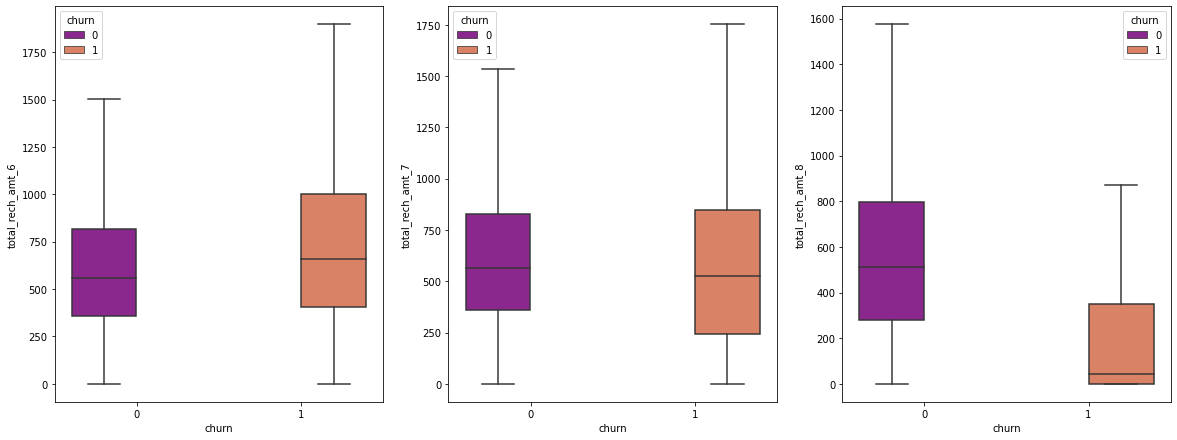

In [810]:
#Univariate analysis for total recharge amount:
plot_box_chart('total_rech_amt')

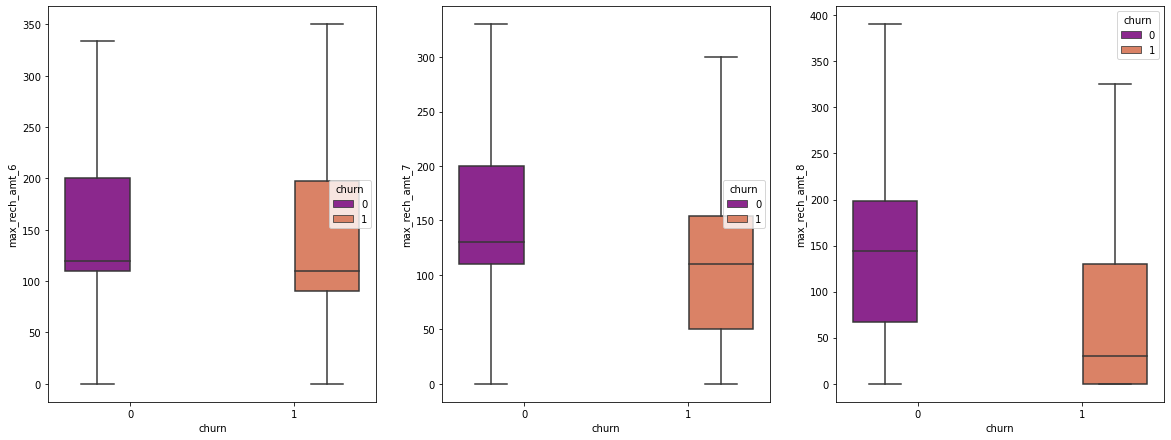

In [811]:
#Univariate analysis for max recharge amount:
plot_box_chart('max_rech_amt')

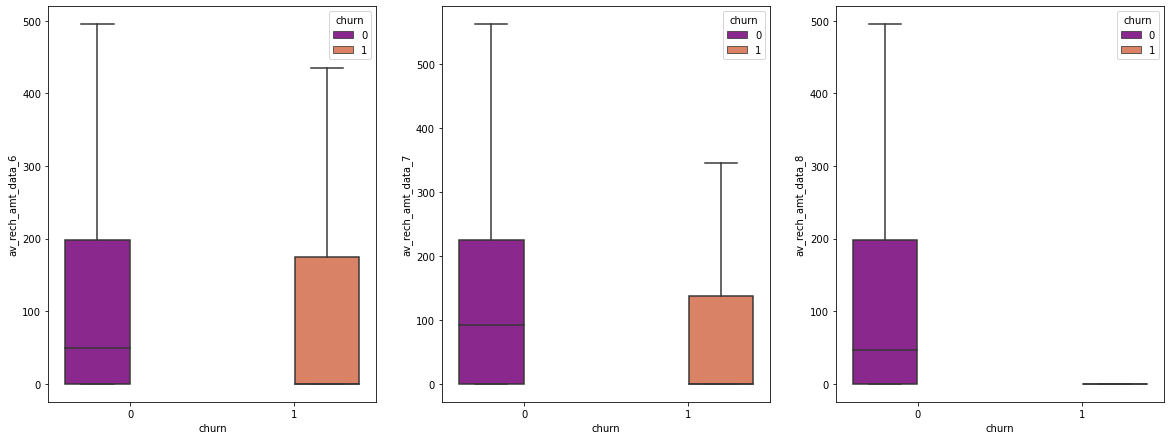

In [812]:
#Univariate analysis for average recharge amount:
plot_box_chart('av_rech_amt_data')

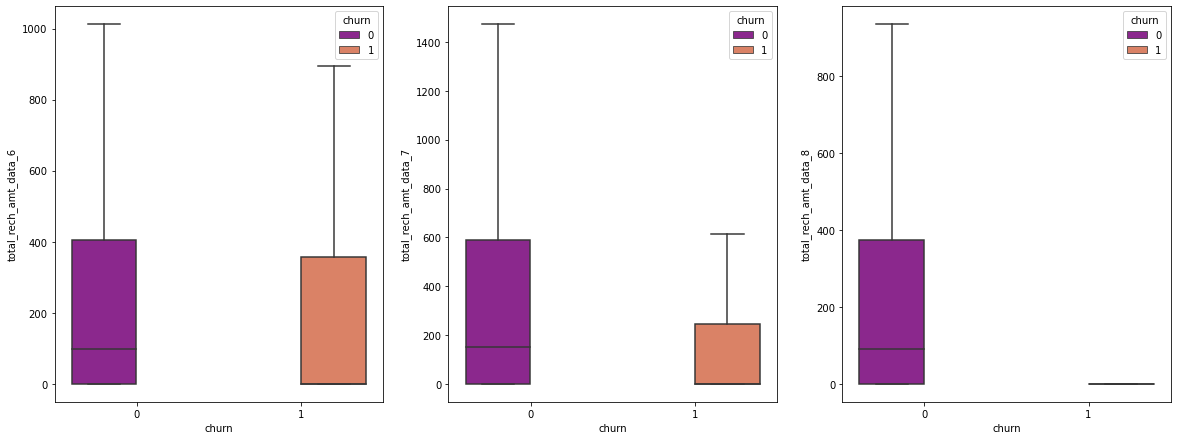

In [813]:
#Univariate analysis for total recharge amount:
plot_box_chart('total_rech_amt_data')

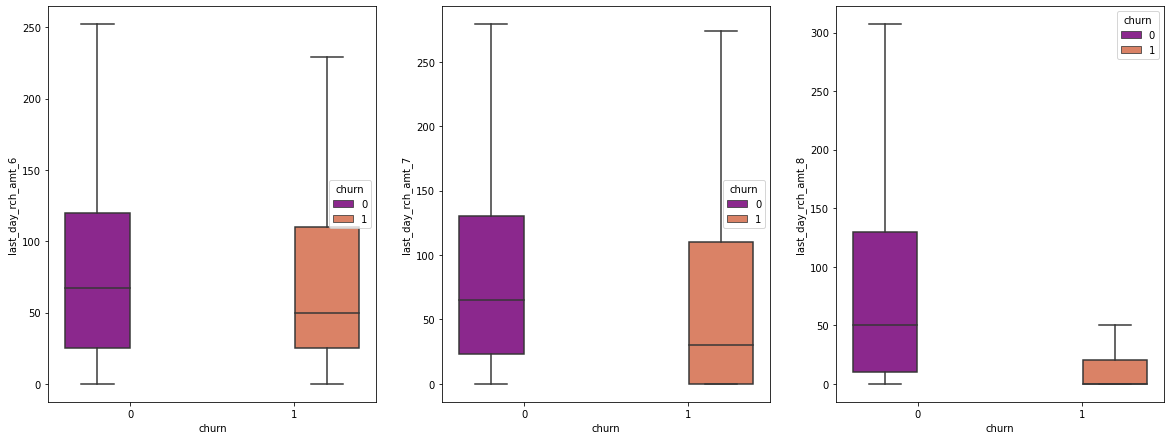

In [814]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

**INFERENCE:**
- It is visible that there is huge amount of Recharges in the 8th month

- Customer whose Average, Total and Last day recharge amount are reasonably low are the one's who churn in the 8th month

**2. 2G and 3G usage related attributes**

In [815]:
df_2g_3g_usage = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('2g|3g',regex=True)]

In [816]:
#let us check the % of NA values present
df_perc_2g_3g_usage = 100 * df_high_value_cust.loc[:,df_2g_3g_usage].isnull().sum()/len(df_high_value_cust.loc[:,df_2g_3g_usage])
df_null_perc = pd.DataFrame(df_perc_2g_3g_usage)
df_null_perc.rename(columns={0:'Null_Percentage'}, inplace=True)
df_null_perc.sort_values(by='Null_Percentage', ascending=False)

,Null_Percentage
arpu_2g_8,46.799987
count_rech_2g_8,46.799987
arpu_3g_8,46.799987
count_rech_3g_8,46.799987
arpu_3g_6,44.112443
arpu_2g_6,44.112443
count_rech_2g_6,44.112443
count_rech_3g_6,44.112443
arpu_3g_7,43.117551
count_rech_3g_7,43.117551


**Inference:**
- More then 40% values are null for count of recharge and average revenue for 2G-3G/user. We have 2G-3G volume usage based data available, hence these columns can be dropped.

In [817]:
df_high_value_cust.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

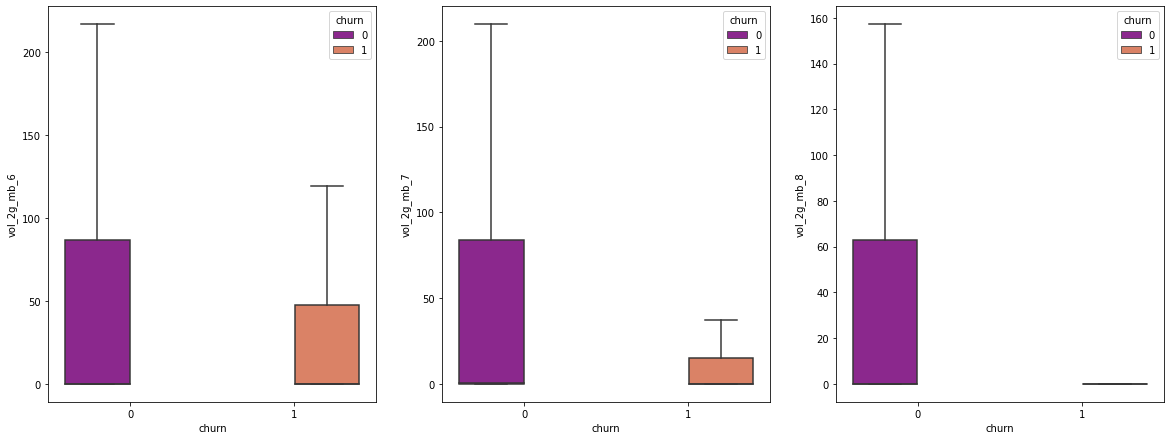

In [818]:
#Univariate analysis for volume of 2G columns:
plot_box_chart('vol_2g_mb')

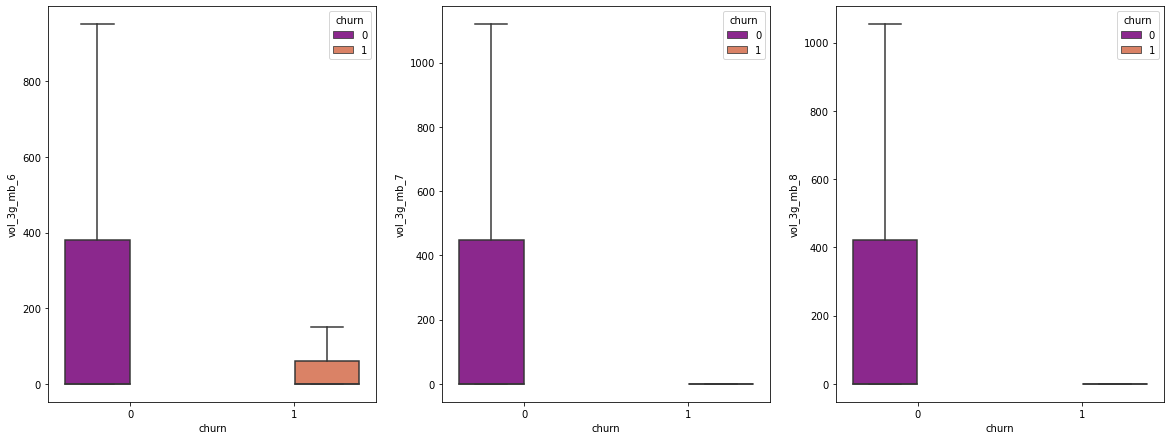

In [819]:
#Univariate analysis for 3G usage columns
plot_box_chart('vol_3g_mb')

**Inference :**
1. 2G and 3G usage for churned customers drops in 8th month
2. 2G/3G usage is higher for non-churned customers which means churned customers might be from areas where 2G/3G service easily available.

In [820]:
#Analysing monthly 2G/3G service schemes
monthly_2g_3g = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [821]:
df_high_value_cust[monthly_2g_3g].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   monthly_2g_6  29953 non-null  int64
 1   monthly_2g_7  29953 non-null  int64
 2   monthly_2g_8  29953 non-null  int64
 3   monthly_3g_6  29953 non-null  int64
 4   monthly_3g_7  29953 non-null  int64
 5   monthly_3g_8  29953 non-null  int64
dtypes: int64(6)
memory usage: 2.8 MB


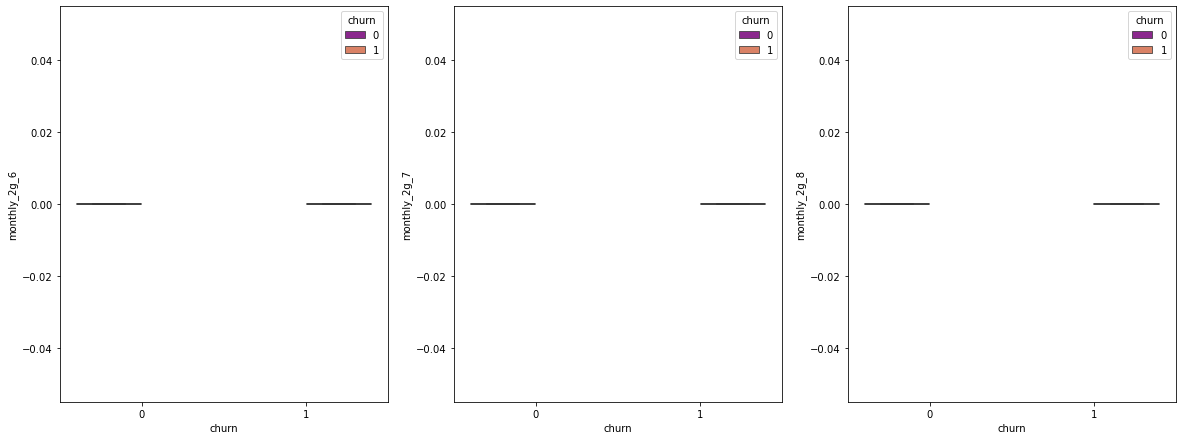

In [822]:
# Univariate analysis for monthly subscription :
plot_box_chart('monthly_2g')

**Inference:** 
1. No significant analysis as values are very low and close to zero.

In [823]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()

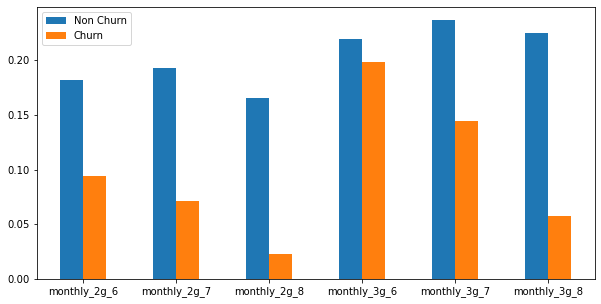

In [824]:
plot_mean_bar_chart(df_high_value_cust, monthly_2g_3g)

**Inference:**
- It is observed that there is a drop in monthly subscription for churned customers in 8th Month.

4. Average Revenue Per User

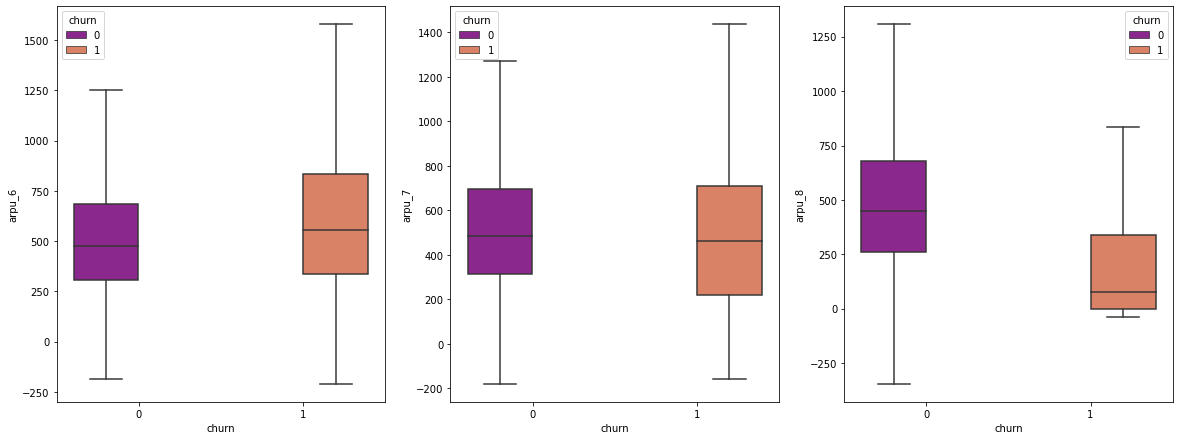

In [825]:
# Univariate analysis for average revenue per user
arpu_columns = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('arpu_')]

plot_box_chart('arpu')

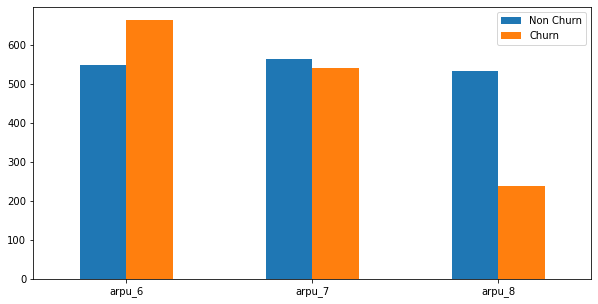

In [826]:
plot_mean_bar_chart(df_high_value_cust, arpu_columns)

**Inference:**
- As seen that there is a drop for ARPU in 8th month for churned customers

5. Minutes of usage - calls

In [827]:
mou_cols = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [828]:
#let us check the % of NA values present in MOU data
df_perc_mou_usage = 100 * df_high_value_cust.loc[:,mou_cols].isnull().sum()/len(df_high_value_cust.loc[:,mou_cols])
df_null_perc = pd.DataFrame(df_perc_mou_usage)
df_null_perc.rename(columns={0:'Null_Percentage'}, inplace=True)
df_null_perc.sort_values(by='Null_Percentage', ascending=False)

,Null_Percentage
isd_ic_mou_8,3.912797
loc_ic_t2t_mou_8,3.912797
loc_ic_t2m_mou_8,3.912797
std_og_t2t_mou_8,3.912797
loc_og_t2c_mou_8,3.912797
loc_ic_t2f_mou_8,3.912797
loc_og_t2f_mou_8,3.912797
loc_ic_mou_8,3.912797
std_og_mou_8,3.912797
loc_og_t2m_mou_8,3.912797


We can conclude that max missing oercentage in 3.91%, So the customers are not using all particular call type and hence we can impute these values with zero's

In [829]:
# replaceing null values by 0 for minutes of usage variables
df_high_value_cust.loc[:,mou_cols] = df_high_value_cust.loc[:,mou_cols].replace(np.NaN,0)

In [830]:
mou_out_cols6 = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]
df_high_value_cust.loc[:,mou_out_cols6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,26.596033,84.574122,163.309546,6.348347,1.577380,254.240239,165.897941,179.439168,1.806292,347.147123,2.174995,5.825077,610.058005
std,116.274169,228.962993,250.218928,22.139546,6.308138,378.546516,403.990737,409.143255,11.988810,608.845412,45.888834,17.579228,691.178402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.380000,19.210000,0.000000,0.000000,32.260000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,116.640000
50%,0.000000,24.360000,77.260000,0.000000,0.000000,124.590000,2.710000,16.360000,0.000000,45.080000,0.000000,0.230000,410.630000
75%,0.000000,78.060000,209.030000,4.230000,0.000000,332.310000,109.560000,154.540000,0.000000,465.290000,0.000000,5.210000,859.030000
max,3775.110000,6431.330000,4729.740000,1466.030000,271.440000,10643.380000,7366.580000,8314.760000,628.560000,8432.990000,5900.660000,1023.210000,10674.030000


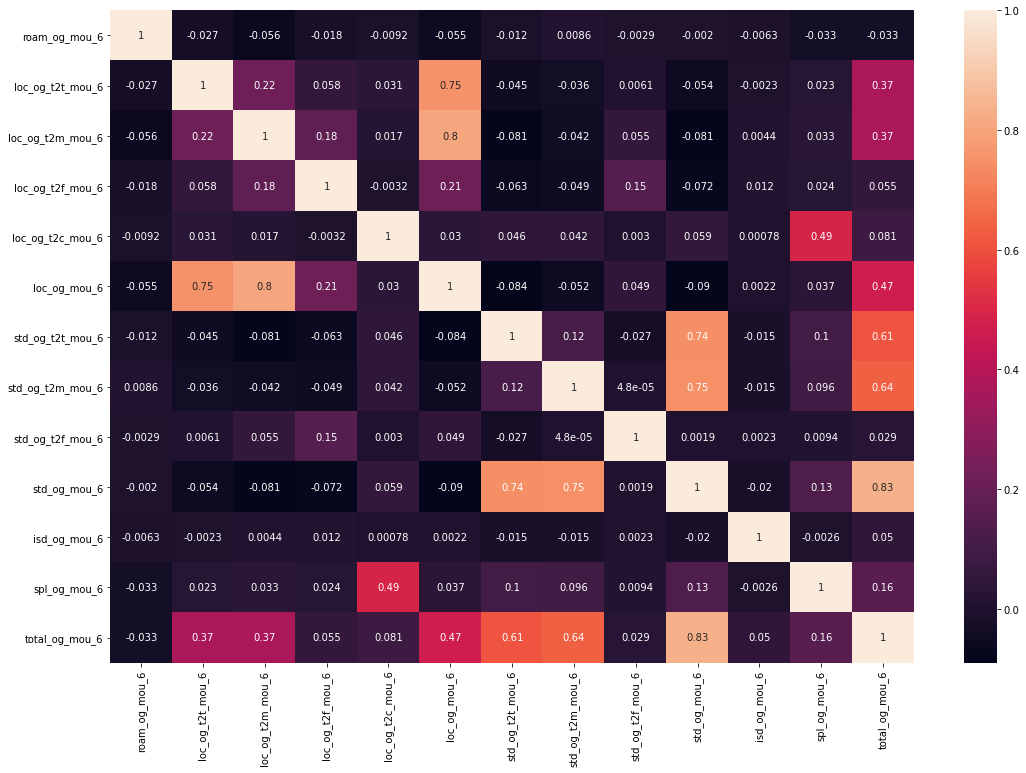

In [831]:
#Bivariate analysis of og_mou cplumns
plt.figure(figsize=(18,12))
sns.heatmap(df_high_value_cust.filter(mou_out_cols6).corr(),annot=True)
plt.show()

**Inference:** 
- It is observed that **total_og_mou_6, std_og_mou_6 and loc_og_mou_6** seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.

In [832]:
list_total_og_cols = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
df_high_value_cust.drop(list_total_og_cols,axis=1,inplace=True)

In [833]:
#For incoming mou variables
mou_incoming_cols6 = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]
df_high_value_cust.loc[:,mou_incoming_cols6].describe()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,16.124001,65.508916,150.474219,15.291721,231.284489,14.896832,29.212448,2.698829,46.811695,290.121569,0.061047,10.800999
std,76.344227,163.855393,219.321437,45.785255,315.005426,77.750215,98.279300,19.114766,137.597749,365.739944,0.188124,76.789627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.100000,28.090000,0.000000,47.910000,0.000000,0.000000,0.000000,1.030000,72.890000,0.000000,0.000000
50%,0.000000,25.080000,84.110000,1.840000,134.560000,0.380000,5.000000,0.000000,11.410000,183.780000,0.000000,0.000000
75%,0.000000,67.480000,188.740000,11.980000,297.260000,8.190000,23.630000,0.110000,41.490000,372.160000,0.000000,0.000000
max,2613.310000,6351.440000,4693.860000,1678.410000,7454.630000,5459.560000,4630.230000,1351.110000,5459.630000,7716.140000,19.760000,6789.410000


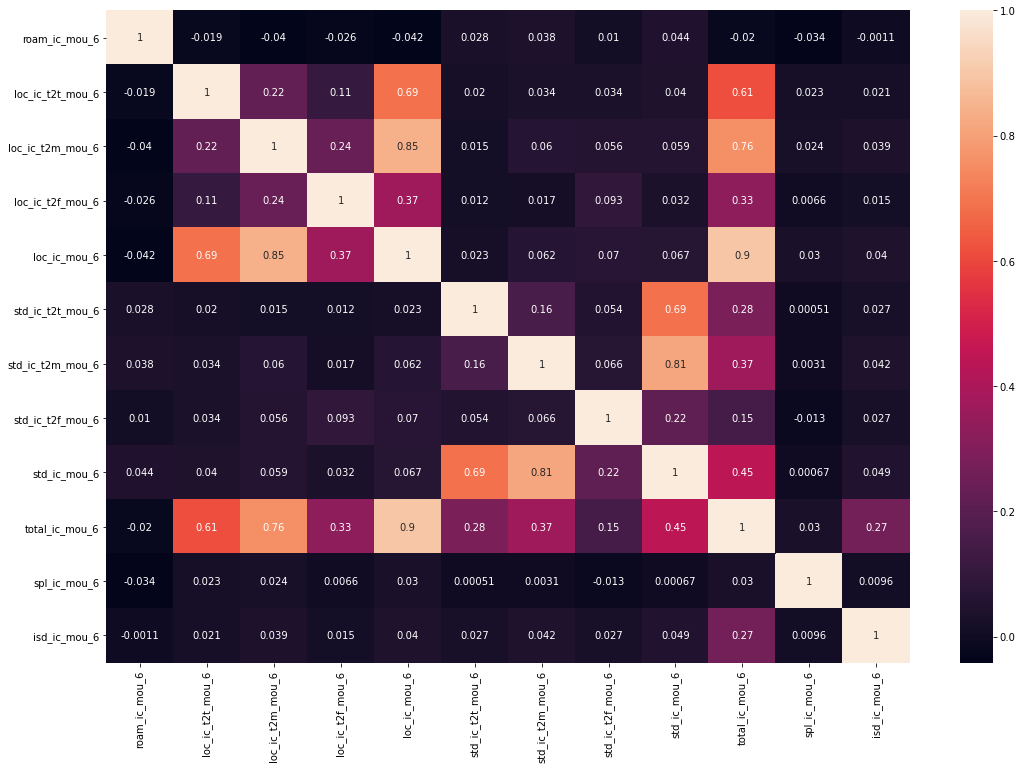

In [834]:
#Bivariate analysis of og_mou cplumns
plt.figure(figsize=(18,12))
sns.heatmap(df_high_value_cust.filter(mou_incoming_cols6).corr(),annot=True)
plt.show()

**Inference:** 
- It is observed that **total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6** have high correlation with other variables and can be dropped.

In [835]:
list_total_ic_cols = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
df_high_value_cust.drop(list_total_ic_cols,axis=1,inplace=True)

In [836]:
print("Shape of Dataframe:", df_high_value_cust.shape)
df_high_value_cust.head()


Shape of Dataframe: (29953, 134)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,NaN,NaN,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,NaT,NaT,NaT,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,NaT,2014-07-31,2014-08-23,0.0,2.0,3.0,NaN,154.0,23.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,

6. Offnet Usage

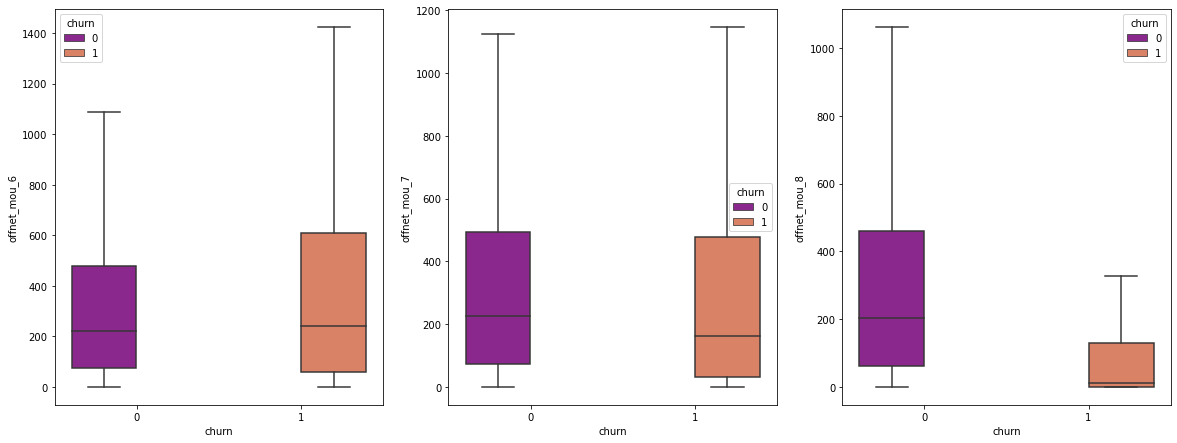

In [837]:
# Offnet mou values for churned and non churned customers
offnet_usage_columns = df_high_value_cust.columns[df_high_value_cust.columns.str.contains('offnet.*mou',regex=True)]
plot_box_chart('offnet_mou')

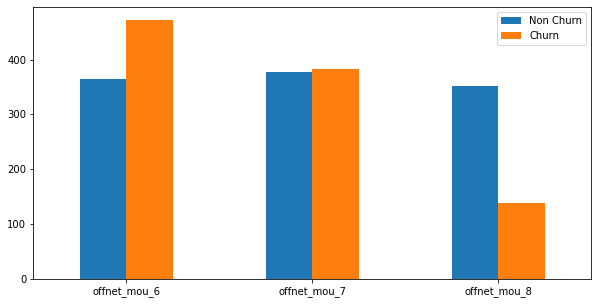

In [838]:
plot_mean_bar_chart(df_high_value_cust, offnet_usage_columns)

**Infference:**
- It is observed that there is a drop for offnet mou services in the 8th month

7. ONNET : All kind of calls within the same operator network

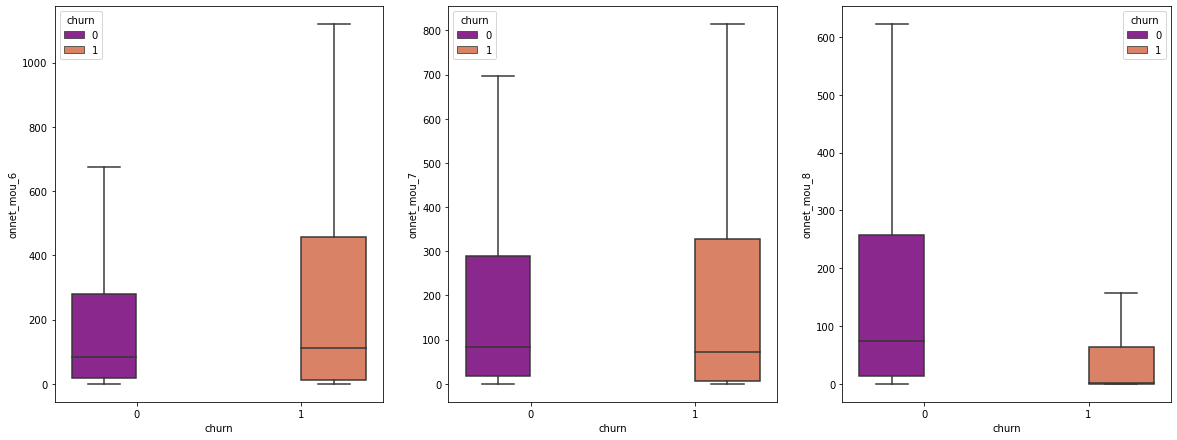

In [839]:
#Univariate analysis for usage related columns
onnet_usage_columns =  df_high_value_cust.columns[df_high_value_cust.columns.str.contains('^onnet.*mou',regex=True)]
plot_box_chart('onnet_mou')

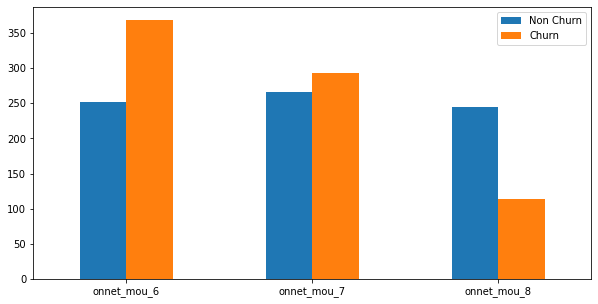

In [840]:
plot_mean_bar_chart(df_high_value_cust, onnet_usage_columns)

**Inference:** 
- As observed that there is a drop in Onnet usage in the 8th month for churned customers

8. Tenure Analysis for Customers

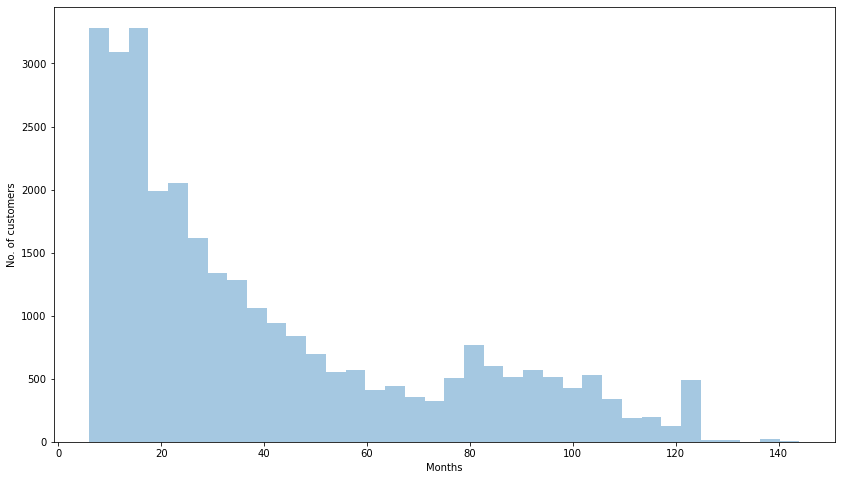

In [841]:
tenure = df_high_value_cust.copy()

plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure['tenure'] = tenure['aon']/30
tenure['tenure'].head()
ax = sns.distplot(tenure['tenure'], hist=True, kde=False, 
             bins=int(180/5))
ax.set_ylabel('No. of customers')
ax.set_xlabel('Months')
plt.show()

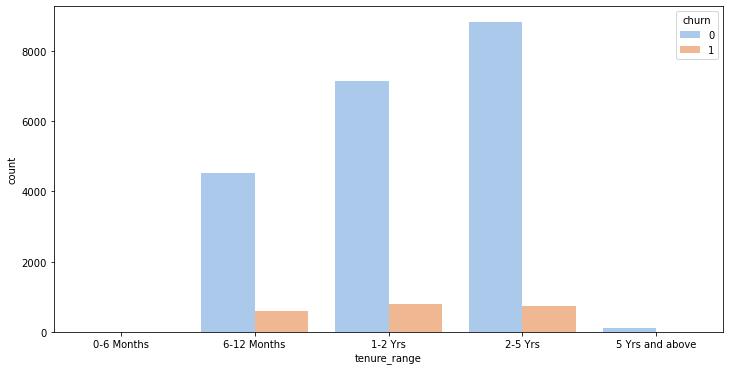

In [842]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure['tenure_range'] = pd.cut(tenure['tenure'], tn_range, labels=tn_label)
#tenure['tenure_range'].head()
plt.figure(figsize=(12,6))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure,palette=("pastel"))
plt.show()

##### Checking columns with NA values.

In [843]:
df_nulls_30 = pd.DataFrame({'Null_Percentage': df_high_value_cust.isnull().sum()/len(df_high_value_cust) * 100})
df_perc_nulls = df_nulls_30[df_nulls_30["Null_Percentage"] > 30]
df_perc_nulls.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
df_perc_nulls['Null_Percentage']
df_perc_nulls

,Null_Percentage
date_of_last_rech_data_8,46.799987
max_rech_data_8,46.799987
night_pck_user_8,46.799987
fb_user_8,46.799987
date_of_last_rech_data_6,44.112443
max_rech_data_6,44.112443
night_pck_user_6,44.112443
fb_user_6,44.112443
date_of_last_rech_data_7,43.117551
max_rech_data_7,43.117551


In [844]:
#Dropping collumns with more than 30% of Null values
df_high_value_cust.drop(df_high_value_cust[df_perc_nulls.index],axis=1,inplace=True)

In [845]:
print("Shape of Dataframe:",df_high_value_cust.shape)
df_high_value_cust.head()

Shape of Dataframe: (29953, 122)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,NaN,NaN,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,14.0

##### Imputing NaN values

In [846]:
df_nan = pd.DataFrame({'Null_Percentage': df_high_value_cust.isnull().sum()/len(df_high_value_cust) * 100})
df_perc_nan = df_nan[df_nan["Null_Percentage"] > 0]
df_perc_nan.sort_values(["Null_Percentage"], axis=0,ascending=False, inplace=True)
df_perc_nan['Null_Percentage']

og_others_8            3.912797
ic_others_8            3.912797
date_of_last_rech_8    1.943044
og_others_6            1.809502
ic_others_6            1.809502
og_others_7            1.789470
ic_others_7            1.789470
date_of_last_rech_7    0.327179
date_of_last_rech_6    0.243715
Name: Null_Percentage, dtype: float64

In [847]:
numberic_col = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

for i in numberic_col:
    df_high_value_cust.loc[df_high_value_cust[i].isnull(),i]=0
    
df_high_value_cust[df_perc_nan.index].head()

,og_others_8,ic_others_8,date_of_last_rech_8,og_others_6,ic_others_6,og_others_7,ic_others_7,date_of_last_rech_7,date_of_last_rech_6
0,0.0,0.00,2014-08-08,0.0,0.00,0.0,0.00,2014-07-16,2014-06-21
7,0.0,15.14,2014-08-26,0.0,15.74,0.0,15.19,2014-07-25,2014-06-27
8,0.0,0.00,2014-08-30,0.0,0.00,0.0,0.00,2014-07-31,2014-06-25
21,0.0,0.00,2014-08-31,0.0,0.00,0.0,0.00,2014-07-31,2014-06-30
23,0.0,13.06,2014-08-24,0.0,0.00,0.0,5.35,2014-07-07,2014-06-18


##### Sanity Check

In [848]:
df_nan = pd.DataFrame({'Null%': df_high_value_cust.isnull().sum()/len(df_high_value_cust) * 100})
df_perc_nan = df_nan[df_nan["Null%"] > 0]
df_perc_nan.sort_values(["Null%"], axis=0,ascending=False, inplace=True)
df_perc_nan['Null%']

date_of_last_rech_8    1.943044
date_of_last_rech_7    0.327179
date_of_last_rech_6    0.243715
Name: Null%, dtype: float64

##### Creating final dataframe

In [849]:
df_final = df_high_value_cust.copy()
print(df_final.shape)
df_final.head()

(29953, 122)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,2014-06-25,2014-07-31,2014-08-30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,14

#### Derive new features

In [850]:
# Dropping column total_avg_rech_amnt_6_7_GPhase as it was used only to derive target variable
df_final.drop(["total_avg_rech_amnt_6_7_GPhase"],axis=1,inplace=True)

In [851]:
# Dropping date column as it will not be useful to determine the classification coefficient
df_final.drop(df_high_value_cust.filter(regex='date_').columns,axis=1,inplace=True)

In [852]:
print(df_final.shape)
df_final.head()

(29953, 118)


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,7

In [853]:
#Taking the average of 6th and 7th month columns and merging them into one
col_list = df_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_final[avg_col_name] = (df_final[col_6]  + df_final[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
total_rech_amt_data


In [854]:
# Now dropping the 6th and 7th mnths columns
col_list_to_drop = df_final.filter(regex='_6|_7')
df_final.drop(col_list_to_drop,axis=1,inplace=True)
print (df_final.shape)
df_final.head()

(29953, 81)


,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_total_rech_amt_data_av67
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.16,4.13,1.15,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,252,1.0,252.0,5.75,109.61,0,0,1,0,968,30.40,0.00,101.20,3.58,252.0,1,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,1.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,252.0
7,7000701601,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.0,27.31,121.19,39.53,30.39,141.33,22.21,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,1,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,13.795,40.825,13.37,0.090,2.25,0.0,45.200,219.525,126.810,24.360,109.215,43.215,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
8,7001524846,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.0,0.31,15.48,0.00,0.10,0.65,0.00,0.0,0.00,0.00,14,120,30,10,3.0,69.0,0.03,11.94,0,3,0,0,315,21.03,910.65,122.16,0.00,207.0,0,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,124.995,11.865,0.00,0.000,0.00,0.0,16.840,35.780,0.000,0.290,13.255,0.000,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,177.0
21,7002124215,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,876.99,0.00,0.00,0.00,0.0,19.54,129.16,10.39,0.18,101.74,0.00,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0.00,0.0,0,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,111.935,737.050,0.00,0.000,0.00,0.0,6.335,96.430,3.725,10.020,52.960,0.000,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
23,7000887461,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,39.61,0.00,0.00,17.71,0.0,76.64,146.84,0.71,13.38,43.91,0.00,0.0,3.74,13.06,4,439,179,0,2.0,270.0,0.01,1009.92,0,0,1,1,604,40.45,51.86,0.00,0.00,540.0,0,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,0.000,4.355,0.00,0.005,0.05,0.0,40.875,104.635,0.000,0.255,8.660,0.000,0.000,14.115,2.675,4.0,227.0,89.5,89.5,1.0,178.0,0.240,299.545,0.0,0.0,1.0,0.0,356.0


The columns related to month 6 & 7 are merged to reduce the number of features. By doing this apporach we have reduced the fetures from 124 to 81.

## Modelling

**Below are 2 main objectives of building predictive models**

1. Predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. Identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In [855]:
# Copy the dataframe to a different variable.
df_model = df_final.copy()

In [856]:
# Shape
df_model.shape

(29953, 81)

In [857]:
# Putting feature variable to X
X = df_model.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = df_model['churn']


In [859]:
# Head
X.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_total_rech_amt_data_av67
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.16,4.13,1.15,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,252,1.0,252.0,5.75,109.61,0,0,1,0,968,30.40,0.00,101.20,3.58,252.0,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.00,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,1.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,252.0
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.0,27.31,121.19,39.53,30.39,141.33,22.21,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,13.795,40.825,13.37,0.090,2.25,0.0,45.200,219.525,126.810,24.360,109.215,43.215,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.0,0.31,15.48,0.00,0.10,0.65,0.00,0.0,0.00,0.00,14,120,30,10,3.0,69.0,0.03,11.94,0,3,0,0,315,21.03,910.65,122.16,0.00,207.0,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,124.995,11.865,0.00,0.000,0.00,0.0,16.840,35.780,0.000,0.290,13.255,0.000,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,177.0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,876.99,0.00,0.00,0.00,0.0,19.54,129.16,10.39,0.18,101.74,0.00,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.00,0.00,0,0,0,0,720,0.00,0.00,0.00,0.00,0.0,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,111.935,737.050,0.00,0.000,0.00,0.0,6.335,96.430,3.725,10.020,52.960,0.000,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,39.61,0.00,0.00,17.71,0.0,76.64,146.84,0.71,13.38,43.91,0.00,0.0,3.74,13.06,4,439,179,0,2.0,270.0,0.01,1009.92,0,0,1,1,604,40.45,51.86,0.00,0.00,540.0,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,0.000,4.355,0.00,0.005,0.05,0.0,40.875,104.635,0.000,0.255,8.660,0.000,0.000,14.115,2.675,4.0,227.0,89.5,89.5,1.0,178.0,0.240,299.545,0.0,0.0,1.0,0.0,356.0


In [860]:
# Head
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

##### Checking the Churn Rate

In [861]:
print("Percenatge of Churned Customer : "+str(round(100 * y.sum()/ len(y),2)))

Percenatge of Churned Customer : 8.12


**Clearly, we can see that only 8.12% of customer are likely to be churn-out and the dataset we have at hand is quite imbalanced to build a predictive model. Hence we need to handle this class imbalance.**

##### Feature Standardisation

As it is important to normalize the values of the features to understand the importance/contribution of a feature to the churn rate, performing the below step.

In [862]:
# Use standard scaler
scaler = StandardScaler()
X_col = X.columns
X_scaled = scaler.fit_transform(X)
X_scale_final = pd.DataFrame(X_scaled, columns=X_col)
#Shape
print(X_scale_final.shape)
X_scale_final.head()

(29953, 79)


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_total_rech_amt_data_av67
0,-0.587674,-0.510841,-0.695309,-0.168679,-0.189787,-0.343476,-0.649478,-0.301900,-0.238110,-0.373493,-0.384626,-0.145041,-0.043625,-0.322777,-0.01739,-0.393039,-0.661296,-0.306103,-0.194993,-0.270094,-0.128812,-0.239999,-0.155900,-0.095845,-0.859812,-0.544124,0.529591,1.098537,-0.207844,0.663408,-0.319829,-0.263422,-0.377738,-0.416099,1.276531,-0.183926,-0.252008,-0.329779,-0.403511,-0.137972,-0.085053,-0.130336,-0.822740,-0.601302,-0.821237,-0.217580,-0.250490,-0.382885,-0.702523,-0.304606,-0.26747,-0.440961,-0.466159,-0.157504,-0.047861,-0.373455,-0.142827,-0.420301,-0.729516,-0.353064,-0.201905,-0.319361,-0.153462,-0.268081,-0.154826,-0.096699,-0.959891,-0.686829,0.526201,1.304802,-0.281673,0.640631,-0.367143,-0.286068,-0.461204,-0.472415,1.358301,-0.230564,-0.194187
1,5.302613,-0.396856,-0.019115,0.257863,0.173388,-0.166450,0.044793,2.425615,-0.238110,-0.343304,-0.264487,1.379645,0.180077,-0.002416,-0.01739,-0.222309,-0.116813,0.579561,0.230718,1.097095,0.986581,-0.239999,0.291204,1.087598,-0.320785,4.993406,8.192812,4.726892,-0.541457,-0.624657,-0.338197,-0.382626,-0.377738,-0.416099,-0.341921,-0.183926,-0.425388,-0.264857,-0.359838,-0.335726,-0.153357,-0.285526,1.510046,-0.473392,0.293269,0.158438,-0.055836,-0.196834,0.924680,2.491601,-0.26747,-0.405208,-0.362562,1.001249,-0.045850,-0.243500,-0.142827,-0.132885,0.330406,2.504287,0.122424,0.842484,2.257838,0.428547,-0.041645,1.028963,-0.786191,1.016523,6.573427,-0.867797,-0.650953,-0.743309,-0.419584,-0.425468,-0.461204,-0.472415,-0.391449,-0.230564,-0.397513
2,-0.739908,-0.434372,-0.412142,-0.168679,-0.189787,-0.288584,-0.433257,-0.301900,0.762241,-0.316735,-0.199578,-0.145041,-0.043625,0.181421,-0.01739,-0.392096,-0.608504,-0.332641,-0.193592,-0.263806,-0.128812,-0.239999,-0.155900,-0.095845,0.433852,-0.760000,-0.751459,-0.567614,0.459382,-0.271972,-0.338101,-0.369641,-0.377738,0.766276,-0.341921,-0.183926,-0.934039,-0.352029,1.648663,-0.087706,-0.153357,-0.158048,-0.289486,0.268015,-0.629816,-0.217580,-0.250490,0.774107,-0.376355,-0.304606,-0.26747,-0.117001,-0.436051,-0.157504,-0.047861,-0.373455,-0.142827,-0.313219,-0.556761,-0.353064,-0.198044,-0.178353,-0.153462,-0.268081,-0.154826,-0.096699,0.950807,-0.275541,-0.316392,-0.652262,-0.281673,-0.257283,0.174018,0.021262,0.828299,-0.265486,-0.391449,-0.230564,-0.254701
3,0.256647,-0.325248,1.345016,-0.168679,-0.189787,-0.240899,-0.201077,-0.220941,-0.238110,-0.218176,1.759453,-0.145041,-0.043625,-0.322777,-0.01739,-0.271170,-0.079742,-0.092879,-0.192471,0.714112,-0.128812,-0.239999,-0.155900,-0.095845,1.835322,0.217981,-0

##### Dividing the data into train and test sets

In [863]:
X_train, X_test, y_train, y_test= train_test_split(X_scale_final, y, train_size=0.7,test_size=0.3, random_state=1)

In [864]:
# Shape of the train set
X_train.shape

(20967, 79)

In [865]:
# Shape of the test set
X_test.shape

(8986, 79)

##### Using SMOTE technique for handling the class imbalance

Here, we handle the class imbalance after the train-test split, because, the model should be able to work well on the un-seen real time data just like the test data. Hence we don't try to balance the test data.

In [866]:
#pip: pip install -U imbalanced-learn
# anaconda: conda install -c conda-forge imbalanced-learn

# Then try to import library in your file:
# from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, sampling_strategy=1.0)
# ?smote

In [867]:
X_train,y_train = sm.fit_resample(X_train,y_train)
print("Shape of train datatset after SMOTE : "+str(X_train.shape))

Shape of train datatset after SMOTE : (38528, 79)


##### Datastructures to capture various Metrics from the models

In [868]:
model_metrics = []
metrics = pd.DataFrame(model_metrics, columns = ['Model', 'Accuracy', 'Precision', 'Recall',  'F-score', 'AUC_ROC', 'Confusion matrix' ])

In [869]:
# Function to calculate various metrics
def fetch_metrics(model, y_test, X_test, model_name):
    global metrics
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1:]
    model_f1_score = f1_score(y_test.values.ravel(), y_pred)
    model_precision_score = precision_score(y_test.values.ravel(), y_pred)
    model_recall_score = recall_score(y_test.values.ravel(), y_pred)
    model_accuracy_score = accuracy_score(y_test.values.ravel(), y_pred)
    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), y_pred_prob)
    model_auc_roc = auc(fpr, tpr)
    model_metrics.append((model_name, model_accuracy_score, model_precision_score, model_recall_score, model_f1_score, model_auc_roc, confusion_matrix(y_test.values.ravel(), y_pred)))
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc_roc )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    model_metric = pd.Series(model_metrics[-1], index=metrics.columns)
    metrics = metrics.append(model_metric, ignore_index=True)
    

**Below are the set of models we are going to build for our below motives.**


1. Identify important variables that are strong predictors of churn - we need models with good interopertability for this. Since, performing PCA will make us lose interpretability, the below mdoels are built without PCA.

    a. Logistic Regression using RFE and statsmodel API
    
    b. Random Forest Classifier without hyperparameter tuning
    
    c. Random Forest Classifier with hyperparameter tuning
    
    
2. Predict whether a high-value customer will churn or not, in near future  - we will use PCA technique here for feature reduction and eliminating multi-collinearity. Here, emphasis will be on building high accuracy models, though not interpretable.

    a. Logistic Regression using sk-learn's LR model

    b. Logistic Regression using sk-learn's LR model on PCA components
    
    c. Random Forest Classifier with hyperparameter tuning on PCA components
    

### Model 1.a Logistic Regression using RFE and statsmodel API

In [870]:
import statsmodels.api as sm

In [871]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38450
Model Family:                Binomial   Df Model:                           77
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14434.
Date:                Wed, 25 Aug 2021   Deviance:                       28867.
Time:                        19:32:19   Pearson chi2:                 3.73e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.3292      0.041    -57.386      0.000      -2.409      -2.250
arpu_8                           0.4959      0.088      5.626      0.000       0.323       0.669
onnet_mou_8                      0.1342      1.670      0.080      0.936      -3.138       3.407
offnet_mou_8                    -0.4390      1.736     -0.253      0.800      -3.842       2.964
roam_ic_mou_8                   -0.0485      0.019     -2.517      0.012      -0.086      -0.011
roam_og_mou_8                    0.0836      0.379      0.220      0.825      -0.660       0.827
loc_og_t2t_mou_8                -0.8623      0.833     -1.036      0.300      -2.494       0.770
loc_og_t2m_mou_8                -0.2075      0.846     -0.245      0.806      -1.865       1.450
loc_og_t2f_mou_8                -0.2518      0.087     -2.880      0.004      -0.423      -0.080
loc_og_t2c_mou_8                 0.1749      0.030      5.895      0.000       0.117       0.233
std_og_t2t_mou_8                -0.5848      1.450     -0.403      0.687      -3.427       2.257
std_og_t2m_mou_8                -0.0203      1.475     -0.014      0.989      -2.912       2.871
std_og_t2f_mou_8                -0.1315      0.058     -2.256      0.024      -0.246      -0.017
isd_og_mou_8                    -0.0546      0.166     -0.329      0.742      -0.380       0.271
spl_og_mou_8                    -0.2734      0.070     -3.887      0.000      -0.411      -0.136
og_others_8                      0.0585      0.017      3.477      0.001       0.026       0.091
loc_ic_t2t_mou_8                -0.7953      0.086     -9.199      0.000      -0.965      -0.626
loc_ic_t2m_mou_8                -1.9579      0.083    -23.505      0.000      -2.121      -1.795
loc_ic_t2f_mou_8                -0.6762      0.077     -8.749      0.000      -0.828      -0.525
std_ic_t2t_mou_8                -0.5132      0.061     -8.442      0.000      -0.632      -0.394
std_ic_t2m_mou_8                -0.1107      0.037     -3.006      0.003      -0.183      -0.038
std_ic_t2f_mou_8                -0.1206      0.062     -1.932      0.053      -0.243       0.002
spl_ic_mou_8                    -0.2497      0.025    -10.061      0.000      -0.298      -0.201
isd_ic_mou_8                    -0.2282      0.041     -5.628      0.000      -0.308      -0.149
ic_others_8                      0.1046      0.030      3.448      0.001       0.045       0.164
total_rech_num_8                -0.4073      0.040    -10.096      0.000      -0.486      -0.328
total_rech_amt_8                -0.5021      0.098     -5.149      0.000      -0.693      -0.311
max_rech_amt_8                   0.1880      0.034      5.458      0.000       0.120       0.255
last_day_rch_amt_8              -0.4382      0.027    -16.170      0.000    

**Performing RFE to reduce the number of features to 15**

In [872]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [873]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [874]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) # Features which are selected by RFE

[('arpu_8', False, 10),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', False, 3),
 ('roam_ic_mou_8', False, 50),
 ('roam_og_mou_8', False, 6),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', False, 44),
 ('loc_og_t2f_mou_8', False, 27),
 ('loc_og_t2c_mou_8', False, 25),
 ('std_og_t2t_mou_8', False, 36),
 ('std_og_t2m_mou_8', False, 5),
 ('std_og_t2f_mou_8', False, 31),
 ('isd_og_mou_8', False, 47),
 ('spl_og_mou_8', False, 24),
 ('og_others_8', False, 49),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 12),
 ('std_ic_t2m_mou_8', False, 35),
 ('std_ic_t2f_mou_8', False, 14),
 ('spl_ic_mou_8', False, 8),
 ('isd_ic_mou_8', False, 26),
 ('ic_others_8', False, 41),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 9),
 ('max_rech_amt_8', False, 11),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_8', True, 1),
 ('av_rech_amt_data_8', True, 1),
 ('vol_2g_mb_8', False, 4),
 ('vol_3g_mb_8', False,

In [875]:
col = X_train.columns[rfe.support_] # Column names selected by RFE

**Build a logistic regression model using the selected columns**

In [876]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38512
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15536.
Date:                Wed, 25 Aug 2021   Deviance:                       31073.
Time:                        19:33:05   Pearson chi2:                 2.50e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.2995      0.039    -58.811      0.000      -2.376      -2.223
onnet_mou_8                -0.5399      0.033    -16.382      0.000      -0.605      -0.475
loc_og_t2t_mou_8           -1.1329      0.078    -14.492      0.000      -1.286      -0.980
loc_ic_t2t_mou_8           -0.7618      0.070    -10.835      0.000      -0.900      -0.624
loc_ic_t2m_mou_8           -2.7510      0.075    -36.581      0.000      -2.898      -2.604
loc_ic_t2f_mou_8           -0.8753      0.067    -13.160      0.000      -1.006      -0.745
total_rech_num_8           -0.4846      0.023    -21.364      0.000      -0.529      -0.440
last_day_rch_amt_8         -0.3131      0.020    -15.670      0.000      -0.352      -0.274
total_rech_data_8          -0.8552      0.038    -22.689      0.000      -0.929      -0.781
av_rech_amt_data_8         -0.5215      0.029    -17.826      0.000      -0.579      -0.464
monthly_2g_8               -0.4990      0.027    -18.320      0.000      -0.552      -0.446
sep_vbc_3g                 -1.8541      0.170    -10.899      0.000      -2.188      -1.521
total_rech_amt_data_8       0.5204      0.041     12.625      0.000       0.440       0.601
avg_onnet_mou_av67          1.4757      0.078     18.834      0.000       1.322       1.629
avg_std_og_t2t_mou_av67    -1.0196      0.071    -14.338      0.000      -1.159      -0.880
avg_loc_ic_t2m_mou_av67     0.8148      0.043     18.881      0.000       0.730       0.899
===========================================================================================
"""

All the features are significant as the p-values are almost zero.

**Calculating the VIF**

In [877]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [878]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,avg_onnet_mou_av67,13.47
13,avg_std_og_t2t_mou_av67,12.94
1,loc_og_t2t_mou_8,2.94
11,total_rech_amt_data_8,2.89
7,total_rech_data_8,2.62
3,loc_ic_t2m_mou_8,2.57
0,onnet_mou_8,2.42
14,avg_loc_ic_t2m_mou_av67,2.15
8,av_rech_amt_data_8,2.08
5,total_rech_num_8,1.59


Clearly, the VIF for 'avg_onnet_mou_av67' is very high and we can drop this feature.

In [879]:
col = col.drop('avg_onnet_mou_av67', 1) # Dropping the feature
col

Index(['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'monthly_2g_8', 'sep_vbc_3g', 'total_rech_amt_data_8',
       'avg_std_og_t2t_mou_av67', 'avg_loc_ic_t2m_mou_av67'],
      dtype='object')

In [880]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
X_test_sm = sm.add_constant(X_test[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38513
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15740.
Date:                Wed, 25 Aug 2021   Deviance:                       31481.
Time:                        19:33:06   Pearson chi2:                 2.67e+07
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -2.2596      0.039    -57.966      0.000      -2.336      -2.183
onnet_mou_8                -0.5146      0.032    -15.868      0.000      -0.578      -0.451
loc_og_t2t_mou_8           -0.1046      0.046     -2.266      0.023      -0.195      -0.014
loc_ic_t2t_mou_8           -0.7864      0.070    -11.240      0.000      -0.923      -0.649
loc_ic_t2m_mou_8           -2.9496      0.075    -39.276      0.000      -3.097      -2.802
loc_ic_t2f_mou_8           -0.9049      0.067    -13.597      0.000      -1.035      -0.774
total_rech_num_8           -0.4987      0.023    -22.087      0.000      -0.543      -0.454
last_day_rch_amt_8         -0.2964      0.020    -14.996      0.000      -0.335      -0.258
total_rech_data_8          -0.8832      0.038    -23.193      0.000      -0.958      -0.809
av_rech_amt_data_8         -0.5513      0.030    -18.580      0.000      -0.610      -0.493
monthly_2g_8               -0.5035      0.027    -18.528      0.000      -0.557      -0.450
sep_vbc_3g                 -1.8694      0.171    -10.922      0.000      -2.205      -1.534
total_rech_amt_data_8       0.5458      0.045     12.218      0.000       0.458       0.633
avg_std_og_t2t_mou_av67     0.2566      0.021     12.517      0.000       0.216       0.297
avg_loc_ic_t2m_mou_av67     0.9355      0.043     21.616      0.000       0.851       1.020
===========================================================================================
"""

All the features are significant from above p-values.

In [881]:
# Calculate the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_rech_amt_data_8,2.89
7,total_rech_data_8,2.62
3,loc_ic_t2m_mou_8,2.56
0,onnet_mou_8,2.42
13,avg_loc_ic_t2m_mou_av67,2.14
8,av_rech_amt_data_8,2.08
1,loc_og_t2t_mou_8,1.65
12,avg_std_og_t2t_mou_av67,1.64
5,total_rech_num_8,1.59
2,loc_ic_t2t_mou_8,1.22


Now the p-values for the features are under limie of 0.05 and also VIF scores are less thean 5. Hence, we are good with these features and model.

In [882]:
df_test = res.params.reset_index() # Features 

In [883]:
df_test

,index,0
0,const,-2.259646
1,onnet_mou_8,-0.514560
2,loc_og_t2t_mou_8,-0.104557
3,loc_ic_t2t_mou_8,-0.786360
4,loc_ic_t2m_mou_8,-2.949633
5,loc_ic_t2f_mou_8,-0.904905
6,total_rech_num_8,-0.498717
7,last_day_rch_amt_8,-0.296364
8,total_rech_data_8,-0.883214
9,av_rech_amt_data_8,-0.551343


**Let's now sort the features based on the absoloute value of their coefficients so that we can features based on their importance**

In [884]:
sm_coef_dict = {}
for i in range(1,15):
    sm_coef_dict[df_test.iloc[i].values[0]] = df_test.iloc[i].values[1]

sm_coef_dict_sorted = sorted(sm_coef_dict, key=lambda dict_key: abs(sm_coef_dict[dict_key]), reverse=True) # Sort the dictionary based on absolute values

sm_final_coeff_lr = {}

for i in sm_coef_dict_sorted[:10]: # Get the top 10 features
    sm_final_coeff_lr[i] = sm_coef_dict[i]

In [885]:
sm_final_coeff_lr # Top 10 features which contribute for the churn rate

{'loc_ic_t2m_mou_8': -2.949633391877142,
 'sep_vbc_3g': -1.8694415410067804,
 'avg_loc_ic_t2m_mou_av67': 0.9355035212487428,
 'loc_ic_t2f_mou_8': -0.9049045391628543,
 'total_rech_data_8': -0.88321425360966,
 'loc_ic_t2t_mou_8': -0.7863595686122185,
 'av_rech_amt_data_8': -0.5513425782889207,
 'total_rech_amt_data_8': 0.545812172830938,
 'onnet_mou_8': -0.5145596967897377,
 'monthly_2g_8': -0.5035172918274394}

### Model 1.b Random Forest Classifier without Hyperparameter Tuning

In [886]:
rfc_default = RandomForestClassifier(random_state=42) # Take RFC with default parameters
rfc_default.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

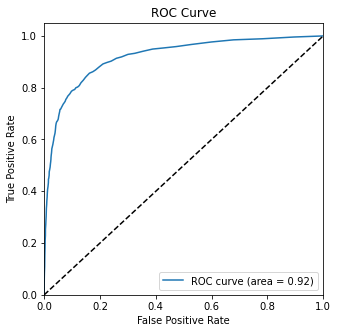

In [887]:
fetch_metrics(rfc_default, y_test, X_test, 'Default Random Forest Classifier without PCA')

In [888]:
metrics

,Model,Accuracy,Precision,Recall,F-score,AUC_ROC,Confusion matrix
0,Default Random Forest Classifier without PCA,0.933118,0.576877,0.663014,0.616953,0.919301,"[[7901, 355], [246, 484]]"


**Let's now sort the features based on the absoloute value of their coefficients so that we can features based on their importance**

In [889]:
rfc_dict_default = {}
for coef, feat in zip(rfc_default.feature_importances_,X_train.columns.values):
    rfc_dict_default[feat] = coef

rfc_dict_default_sorted = sorted(rfc_dict_default, key=lambda dict_key: abs(rfc_dict_default[dict_key]), reverse=True)

final_coeff_rfc_default = {}

for i in rfc_dict_default_sorted[:10]:
    final_coeff_rfc_default[i] = rfc_dict_default[i]

In [890]:
final_coeff_rfc_default # Top 10 features which contribute to churn rate

{'loc_ic_t2m_mou_8': 0.08295772185071004,
 'total_rech_amt_8': 0.06082822217957227,
 'roam_og_mou_8': 0.05146557019692274,
 'roam_ic_mou_8': 0.048652237469153384,
 'last_day_rch_amt_8': 0.043629130727681785,
 'loc_ic_t2t_mou_8': 0.04085810109070714,
 'total_rech_data_8': 0.03909305962807554,
 'max_rech_amt_8': 0.03822650616088196,
 'arpu_8': 0.03744244356446792,
 'total_rech_amt_data_8': 0.03640132795378707}

#### Random Forest Parameter Tuning

Going with the default parameters may overfit the model and we need to set right values for building the model without compromising much on the variance explained.

Here, we have considered the following features for hyperparameter tuning:

    1. max_depth - The maximum depth of the tree. We went with three ransom values of 12, 15 and 18 here.
    
    2. n_estimators - The number of trees in the forest. While the default value is 100, we also wanted to try with 200.
    
    3. min_samples_leaf - The minimum number of samples required to be at a leaf node. As the sample set is high, we chose a big number here i.e., 10 and 20
    
    4. min_samples_split -  The minimum number of samples required to split an internal node. We chose 10, 20 and 30 in random here.
    
    5. max_features - The number of features to consider when looking for the best split. As the feature set size is 79 here, we chose half of that 30 and 40.

In [404]:
#Pick different values for parameters
params = {
    'max_depth': [12,15,18],
    'n_estimators': [100,200],
    'min_samples_leaf': [10,20],
    'min_samples_split': [10,20,30],
    'max_features': [30,40]
}
# Create a based model
rf = RandomForestClassifier(random_state=42)
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = params, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)

In [405]:
rf_grid_search.fit(X_train, y_train) # Fit the Grid Search Model

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 53.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 64.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [12, 15, 18], 'max_features': [30, 40],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [100, 200]},
             return_train_score=True, verbose=1)

In [406]:
print(rf_grid_search.best_params_) # Best params from the Grid Search model
print(rf_grid_search.best_score_) # Best score from the Grid Search model

{'max_depth': 18, 'max_features': 30, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 200}
0.9405887779111719


**Building the RFC with hypertuned parameters**

### Model 1.c Random Forest Classifier with Hyperparameter Tuning

In [891]:
rfc_opt = RandomForestClassifier(max_depth=18,
                             min_samples_leaf=10,
                             min_samples_split=10,
                             n_estimators=200,
                             max_features=30,
                             n_jobs = -1,
                             random_state=42)
rfc_opt.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, max_features=30, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=200, n_jobs=-1,
                       random_state=42)

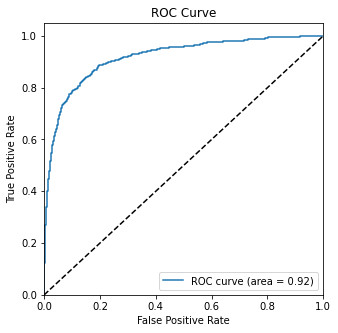

In [892]:
fetch_metrics(rfc_opt, y_test, X_test, '[Hyper] Random Forest Classifier without PCA')

In [893]:
metrics

,Model,Accuracy,Precision,Recall,F-score,AUC_ROC,Confusion matrix
0,Default Random Forest Classifier without PCA,0.933118,0.576877,0.663014,0.616953,0.919301,"[[7901, 355], [246, 484]]"
1,[Hyper] Random Forest Classifier without PCA,0.921545,0.512291,0.713699,0.596451,0.917495,"[[7760, 496], [209, 521]]"


**Let's now sort the features based on the absoloute value of their coefficients so that we can features based on their importance**

In [894]:
rfc_dict_opt = {}
for coef, feat in zip(rfc_opt.feature_importances_,X_train.columns.values):
    rfc_dict_opt[feat] = coef

rfc_dict_opt_sorted = sorted(rfc_dict_opt, key=lambda dict_key: abs(rfc_dict_opt[dict_key]), reverse=True)

final_coeff_rfc_opt = {}

for i in rfc_dict_opt_sorted[:10]:
    final_coeff_rfc_opt[i] = rfc_dict_opt[i]

In [895]:
final_coeff_rfc_opt # Top 10 features which contribute to churn rate

{'loc_ic_t2m_mou_8': 0.19269805333813728,
 'total_rech_amt_8': 0.11438784337821471,
 'roam_og_mou_8': 0.0979062659030767,
 'roam_ic_mou_8': 0.05703633138949494,
 'total_rech_data_8': 0.05066153809784983,
 'arpu_8': 0.04780504900419889,
 'av_rech_amt_data_8': 0.03997109769113,
 'loc_og_t2m_mou_8': 0.037864726124690606,
 'loc_ic_t2t_mou_8': 0.031556810793520365,
 'last_day_rch_amt_8': 0.02911369554656028}

**Now, let's shift our emphasis on building a high performance model**

### Model 2.a: Logistic Regression using sk-learn's LR model

In [896]:
lr = LogisticRegression()
X_train_lr = X_train[col] # Using only the columns identified earlier to avoid multi-collinearity
X_test_lr = X_test[col]
model = lr.fit(X_train_lr,y_train)

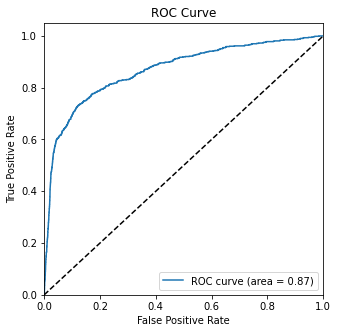

In [897]:
fetch_metrics(model, y_test, X_test_lr, 'Logisctic Regression without PCA')

In [898]:
metrics

,Model,Accuracy,Precision,Recall,F-score,AUC_ROC,Confusion matrix
0,Default Random Forest Classifier without PCA,0.933118,0.576877,0.663014,0.616953,0.919301,"[[7901, 355], [246, 484]]"
1,[Hyper] Random Forest Classifier without PCA,0.921545,0.512291,0.713699,0.596451,0.917495,"[[7760, 496], [209, 521]]"
2,Logisctic Regression without PCA,0.787558,0.248399,0.797260,0.378783,0.868242,"[[6495, 1761], [148, 582]]"


**Let's now sort the features based on the absoloute value of their coefficients so that we can features based on their importance**

In [899]:
lr.coef_

array([[-0.51473213, -0.10583466, -0.78642214, -2.93340951, -0.90401982,
        -0.4995884 , -0.29721989, -0.88213705, -0.5513977 , -0.50351521,
        -1.81796722,  0.54438225,  0.257001  ,  0.92754374]])

In [900]:
coef_dict = {}
for coef, feat in zip(lr.coef_[0,:],X_train.columns.values):
    coef_dict[feat] = coef

coef_dict_sorted_lr = sorted(coef_dict, key=lambda dict_key: abs(coef_dict[dict_key]), reverse=True)

final_coeff_lr = {}

for i in coef_dict_sorted_lr[:10]:
    final_coeff_lr[i] = coef_dict[i]

In [901]:
final_coeff_lr # Top 10 features which contribute to churn rate

{'roam_ic_mou_8': -2.933409513733518,
 'std_og_t2m_mou_8': -1.8179672158727247,
 'spl_og_mou_8': 0.9275437428418644,
 'roam_og_mou_8': -0.9040198246655154,
 'loc_og_t2f_mou_8': -0.882137052086104,
 'offnet_mou_8': -0.7864221415844334,
 'loc_og_t2c_mou_8': -0.5513976963482585,
 'std_og_t2f_mou_8': 0.5443822505160437,
 'arpu_8': -0.5147321264344829,
 'std_og_t2t_mou_8': -0.503515210486373}

**Before we move into building models using PCA, lets perform some analysis and find out the right number of components to be considered for feature reduction and avoiding multicollinearity**

##### Components from PCA

In [902]:
pca = PCA(svd_solver='randomized', random_state=101)
pca.fit(X_train)

PCA(random_state=101, svd_solver='randomized')

In [903]:
pca.components_

array([[ 2.81652757e-01,  1.30368755e-01,  1.97053751e-01, ...,
         2.82760593e-02, -5.06798581e-02, -6.16257399e-02],
       [ 9.32221363e-02, -6.52055779e-02, -2.17001313e-02, ...,
         2.16968692e-01,  1.14912464e-01,  2.21629138e-01],
       [-1.03762023e-01, -1.17303307e-01, -1.27527530e-01, ...,
         1.97339571e-02, -1.11860170e-02, -9.78615245e-03],
       ...,
       [-1.84548357e-03, -4.38746592e-01, -4.50482712e-01, ...,
         1.46874265e-05,  1.95493015e-05, -1.47790877e-04],
       [-3.24082434e-16, -5.36000553e-16, -7.06608748e-16, ...,
         9.07319014e-03,  1.50607158e-02,  3.59385345e-17],
       [-0.00000000e+00, -1.78713276e-19,  1.06341812e-16, ...,
        -1.49560921e-01, -2.48258276e-01, -9.82992653e-17]])

##### Variance ratio for each component 

In [904]:
pca.explained_variance_ratio_

array([1.01595025e-01, 8.85624326e-02, 6.73985874e-02, 5.57379720e-02,
       4.43542394e-02, 4.00714352e-02, 3.13894903e-02, 2.84497510e-02,
       2.69768920e-02, 2.61077609e-02, 2.40622963e-02, 2.23321146e-02,
       2.13748537e-02, 2.04994579e-02, 1.91415286e-02, 1.85346914e-02,
       1.77459431e-02, 1.67601804e-02, 1.58732744e-02, 1.54406412e-02,
       1.54145639e-02, 1.49349386e-02, 1.44173831e-02, 1.39545653e-02,
       1.29232379e-02, 1.23972808e-02, 1.17895157e-02, 1.12315738e-02,
       1.03112016e-02, 1.02090441e-02, 9.87466797e-03, 9.40735866e-03,
       8.83533249e-03, 8.56481656e-03, 8.18615373e-03, 7.94618945e-03,
       7.59410160e-03, 6.75394222e-03, 6.71050523e-03, 6.59662889e-03,
       5.62998992e-03, 5.05140316e-03, 4.73582145e-03, 4.63007953e-03,
       4.44032274e-03, 4.13831190e-03, 4.04078381e-03, 3.96289554e-03,
       3.75038138e-03, 3.61779082e-03, 3.34103692e-03, 3.09207664e-03,
       3.07945919e-03, 2.87491692e-03, 2.72486870e-03, 2.65101523e-03,
      

##### Scree Plot

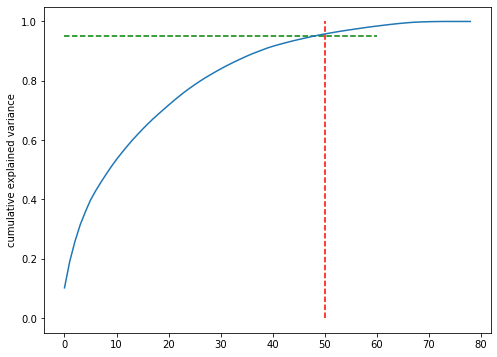

In [905]:
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('cumulative explained variance')
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=60, xmin=0, colors="g", linestyles="--")
plt.show()

50 components are able to describe 95% of the variance in the dataset.We can select 50 components for our modeling

In [906]:
#Columns
col = list(X_train.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head()

,PC1,PC2,PC3,Feature
0,0.281653,0.093222,-0.103762,arpu_8
1,0.130369,-0.065206,-0.117303,onnet_mou_8
2,0.197054,-0.021700,-0.127528,offnet_mou_8
3,0.191636,-0.037124,0.379201,roam_ic_mou_8
4,0.207339,-0.047492,0.315478,roam_og_mou_8


In [907]:
# Applying PCA : Pricnipal Component Analysis
pca = IncrementalPCA(n_components=50) #features selected are 50    
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("Shape of train datatset after PCA : "+str(X_train_pca.shape))

Shape of train datatset after PCA : (38528, 50)


In [908]:
corrmat = np.corrcoef(X_train_pca.transpose()) # Generate correlation matrix

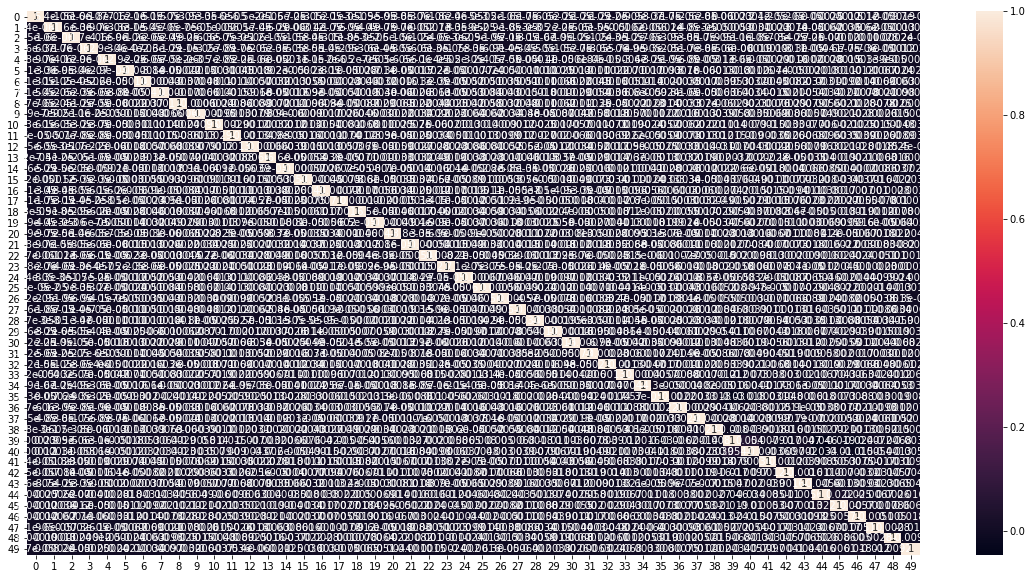

In [909]:
plt.figure(figsize = (20,10))
sns.heatmap(corrmat, annot = True)
plt.show()

**As we can see above, other than the diagonal, all other correlations are close to 0, indicating that we don't have any correlation between the generated principal components**

### Model 2.b: Logistic Regression using sk-learn's LR model on PCA components

In [910]:
lr1 = LogisticRegression() # Building the logistic regression build
model1 = lr1.fit(X_train_pca,y_train) # Fitting the model

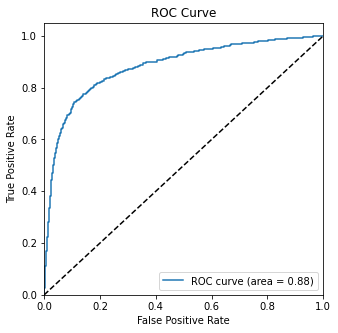

In [911]:
fetch_metrics(model1, y_test, X_test_pca, 'Logisctic Regression with PCA')

In [912]:
metrics

,Model,Accuracy,Precision,Recall,F-score,AUC_ROC,Confusion matrix
0,Default Random Forest Classifier without PCA,0.933118,0.576877,0.663014,0.616953,0.919301,"[[7901, 355], [246, 484]]"
1,[Hyper] Random Forest Classifier without PCA,0.921545,0.512291,0.713699,0.596451,0.917495,"[[7760, 496], [209, 521]]"
2,Logisctic Regression without PCA,0.787558,0.248399,0.797260,0.378783,0.868242,"[[6495, 1761], [148, 582]]"
3,Logisctic Regression with PCA,0.819163,0.284545,0.809589,0.421090,0.881477,"[[6770, 1486], [139, 591]]"


In [913]:
lr1.coef_ # coefficients

array([[-0.34942451, -0.70181925,  0.56967132, -0.1124229 ,  0.33114968,
         0.79150802,  0.05117285,  0.60595285, -0.17703421, -0.53911284,
        -0.29594965, -0.1463646 , -0.08536752,  0.06890626,  0.30628916,
         0.01286685, -0.02088115,  0.06511699, -0.06694131,  0.01710108,
         0.17202594,  0.01102778, -0.30218181, -0.04360414,  0.01014769,
         0.11217299, -0.48566605,  0.11870935,  0.06648736, -0.08037286,
         0.02556073,  0.17270784, -1.30101419, -0.00591694, -1.36411262,
        -0.0155595 ,  0.20101977,  0.47992727, -0.29175512, -0.39541256,
         0.16662043, -0.90643747, -0.27016708,  0.00519083,  0.06102352,
         0.00284825, -0.12122431, -0.02221355, -0.55969508, -0.23965521]])

### Model 2.c: Random Forest Classifier with hyperparameter tuning on PCA components

In [914]:
# Here we are building the RFC model using the optimal parameters found during earlier stage of hypertuning
rfc_opt_pca = RandomForestClassifier(max_depth=18,
                             min_samples_leaf=10,
                             min_samples_split=10,
                             n_estimators=200,
                             max_features=30,
                             n_jobs = -1,
                             random_state=42)
rfc_opt_pca.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=18, max_features=30, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=200, n_jobs=-1,
                       random_state=42)

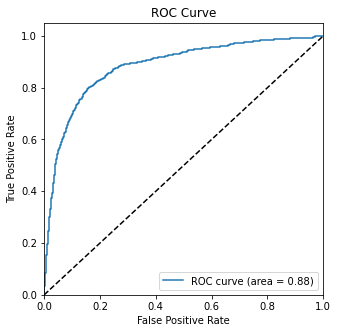

In [915]:
fetch_metrics(rfc_opt_pca, y_test, X_test_pca, '[Hyper] Random Forest Classifier with PCA')

In [916]:
metrics

,Model,Accuracy,Precision,Recall,F-score,AUC_ROC,Confusion matrix
0,Default Random Forest Classifier without PCA,0.933118,0.576877,0.663014,0.616953,0.919301,"[[7901, 355], [246, 484]]"
1,[Hyper] Random Forest Classifier without PCA,0.921545,0.512291,0.713699,0.596451,0.917495,"[[7760, 496], [209, 521]]"
2,Logisctic Regression without PCA,0.787558,0.248399,0.797260,0.378783,0.868242,"[[6495, 1761], [148, 582]]"
3,Logisctic Regression with PCA,0.819163,0.284545,0.809589,0.421090,0.881477,"[[6770, 1486], [139, 591]]"
4,[Hyper] Random Forest Classifier with PCA,0.894169,0.406908,0.661644,0.503912,0.882609,"[[7552, 704], [247, 483]]"


## Summary

#### Finding the significant features from various models

In [917]:
# Collate the top 10 features from different models
coeffs_final = list(zip(list(sm_final_coeff_lr.keys()), list(final_coeff_lr.keys()), list(final_coeff_rfc_default.keys()), list(final_coeff_rfc_opt.keys())))

In [918]:
# Create dataframe
df_coeffs = pd.DataFrame.from_records(coeffs_final, columns = ['Coefficients from SM', 'Coefficients from LR', 'Coefficients from default RFC', 'Coefficients from hyperprameter tuned RFC'])

In [919]:
df_coeffs.head(10)

,Coefficients from SM,Coefficients from LR,Coefficients from default RFC,Coefficients from hyperprameter tuned RFC
0,loc_ic_t2m_mou_8,roam_ic_mou_8,loc_ic_t2m_mou_8,loc_ic_t2m_mou_8
1,sep_vbc_3g,std_og_t2m_mou_8,total_rech_amt_8,total_rech_amt_8
2,avg_loc_ic_t2m_mou_av67,spl_og_mou_8,roam_og_mou_8,roam_og_mou_8
3,loc_ic_t2f_mou_8,roam_og_mou_8,roam_ic_mou_8,roam_ic_mou_8
4,total_rech_data_8,loc_og_t2f_mou_8,last_day_rch_amt_8,total_rech_data_8
5,loc_ic_t2t_mou_8,offnet_mou_8,loc_ic_t2t_mou_8,arpu_8
6,av_rech_amt_data_8,loc_og_t2c_mou_8,total_rech_data_8,av_rech_amt_data_8
7,total_rech_amt_data_8,std_og_t2f_mou_8,max_rech_amt_8,loc_og_t2m_mou_8
8,onnet_mou_8,arpu_8,arpu_8,loc_ic_t2t_mou_8
9,monthly_2g_8,std_og_t2t_mou_8,total_rech_amt_data_8,last_day_rch_amt_8


#### Plots

In [920]:
sm_final_coeff_lr

{'loc_ic_t2m_mou_8': -2.949633391877142,
 'sep_vbc_3g': -1.8694415410067804,
 'avg_loc_ic_t2m_mou_av67': 0.9355035212487428,
 'loc_ic_t2f_mou_8': -0.9049045391628543,
 'total_rech_data_8': -0.88321425360966,
 'loc_ic_t2t_mou_8': -0.7863595686122185,
 'av_rech_amt_data_8': -0.5513425782889207,
 'total_rech_amt_data_8': 0.545812172830938,
 'onnet_mou_8': -0.5145596967897377,
 'monthly_2g_8': -0.5035172918274394}

In [921]:
final_coeff_lr

{'roam_ic_mou_8': -2.933409513733518,
 'std_og_t2m_mou_8': -1.8179672158727247,
 'spl_og_mou_8': 0.9275437428418644,
 'roam_og_mou_8': -0.9040198246655154,
 'loc_og_t2f_mou_8': -0.882137052086104,
 'offnet_mou_8': -0.7864221415844334,
 'loc_og_t2c_mou_8': -0.5513976963482585,
 'std_og_t2f_mou_8': 0.5443822505160437,
 'arpu_8': -0.5147321264344829,
 'std_og_t2t_mou_8': -0.503515210486373}

In [922]:
# Creating dataframe for statsmodel API
df_sm_final_coeff_lr = pd.DataFrame.from_records(list(sm_final_coeff_lr.items()), columns = ['Feature Name', 'Coefficients'])
df_sm_final_coeff_lr['Importance'] = df_sm_final_coeff_lr.Coefficients.apply(lambda x: abs(x))
df_sm_final_coeff_lr.head()

,Feature Name,Coefficients,Importance
0,loc_ic_t2m_mou_8,-2.949633,2.949633
1,sep_vbc_3g,-1.869442,1.869442
2,avg_loc_ic_t2m_mou_av67,0.935504,0.935504
3,loc_ic_t2f_mou_8,-0.904905,0.904905
4,total_rech_data_8,-0.883214,0.883214


In [923]:
# Creating dataframe for LR model

df_lr_coeffs = pd.DataFrame.from_records(list(final_coeff_lr.items()), columns = ['Feature Name', 'Coefficients'])

df_lr_coeffs['Importance'] = df_lr_coeffs.Coefficients.apply(lambda x: abs(x))

df_lr_coeffs.head()

,Feature Name,Coefficients,Importance
0,roam_ic_mou_8,-2.933410,2.933410
1,std_og_t2m_mou_8,-1.817967,1.817967
2,spl_og_mou_8,0.927544,0.927544
3,roam_og_mou_8,-0.904020,0.904020
4,loc_og_t2f_mou_8,-0.882137,0.882137


In [924]:
# Creating dataframe for default RFC
df_final_coeff_rfc_default = pd.DataFrame.from_records(list(final_coeff_rfc_default.items()), columns = ['Feature Name', 'Importance'])

In [925]:
# Creating dataframe for hyperparameter tuned RFC
df_final_coeff_rfc_opt = pd.DataFrame.from_records(list(final_coeff_rfc_opt.items()), columns = ['Feature Name', 'Importance'])

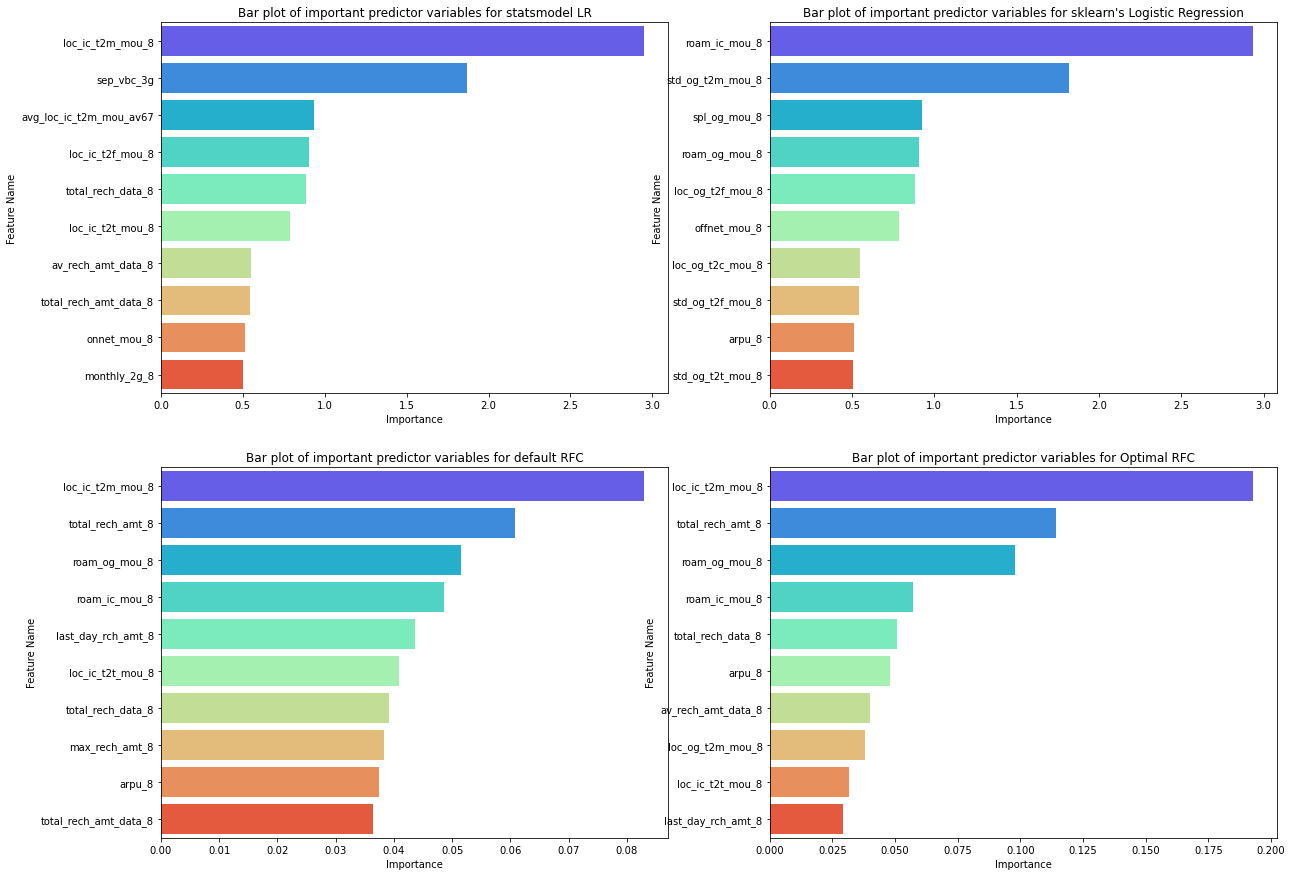

In [926]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(y = 'Feature Name', x='Importance', palette='rainbow', data = df_sm_final_coeff_lr)
plt.title('Bar plot of important predictor variables for statsmodel LR')
plt.subplot(2,2,2)
sns.barplot(y = 'Feature Name', x='Importance', palette='rainbow', data = df_lr_coeffs)
plt.title('Bar plot of important predictor variables for sklearn\'s Logistic Regression')
plt.subplot(2,2,3)
sns.barplot(y = 'Feature Name', x='Importance', palette='rainbow', data = df_final_coeff_rfc_default)
plt.title('Bar plot of important predictor variables for default RFC')
plt.subplot(2,2,4)
sns.barplot(y = 'Feature Name', x='Importance', palette='rainbow', data = df_final_coeff_rfc_opt)
plt.title('Bar plot of important predictor variables for Optimal RFC')
plt.show()

**Inferences:**

1. From the above plots, we can infer that the below features are common from various models. Hence these features are crucial indicators of churn.

        loc_ic_t2m_mou_8
        loc_ic_t2t_mou_8
        total_rech_amt_8
        total_rech_data_8
        total_rech_amt_data_8
        roam_og_mou_8
        roam_ic_mou_8
        arpu_8
        
2. Also, since the logistic regression models have higher recall as compared to other models, the features identified by this model should be of great importance to us. The model with higher recall will have lesser False negatives and we don't miss on customers who might churn.

        roam_ic_mou_8
        std_og_t2m_mou_8
        spl_og_mou_8
        roam_og_mou_8
        loc_og_t2f_mou_8
        offnet_mou_8
        loc_og_t2c_mou_8
        std_og_t2f_mou_8
        arpu_8
        std_og_t2t_mou_8
        
        
3. Now, deciphering the above features, we can propose the following recommendations:

    **a. Local incoming calls within same telecom circle to same or different operator for 8th month provides a strong indicator of churn behaviour. (loc_ic_t2m_mou_8 and loc_ic_t2t_mou_8)**
    
    **b. Total recharge amount and data are other key indicators of the churn. (total_rech_amt_8, total_rech_data_8 and total_rech_amt_data_8)**
    
    **c. Roaming calls (both Incoming and Outgoing Calls) for 8th month are good indicators of churn behaviour (roam_og_mou_8 and roam_ic_mou_8)**
    
    **d. STD outgoing calls are also among the key indicators.**
    
    **e. Average revenue per user ia also an important feature in determining churn prediction.(arpu_8)**
    
    **f. Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.**

### Insights and metrics from the models

In [927]:
metrics # Summarize the metrics from various models

,Model,Accuracy,Precision,Recall,F-score,AUC_ROC,Confusion matrix
0,Default Random Forest Classifier without PCA,0.933118,0.576877,0.663014,0.616953,0.919301,"[[7901, 355], [246, 484]]"
1,[Hyper] Random Forest Classifier without PCA,0.921545,0.512291,0.713699,0.596451,0.917495,"[[7760, 496], [209, 521]]"
2,Logisctic Regression without PCA,0.787558,0.248399,0.797260,0.378783,0.868242,"[[6495, 1761], [148, 582]]"
3,Logisctic Regression with PCA,0.819163,0.284545,0.809589,0.421090,0.881477,"[[6770, 1486], [139, 591]]"
4,[Hyper] Random Forest Classifier with PCA,0.894169,0.406908,0.661644,0.503912,0.882609,"[[7552, 704], [247, 483]]"


**Inference 1:**

**Since one of our main objectives is to effectively identify all the customers who might churn and retain them by providing offers, incentives etc., we need to keep the False Negatives(FN) as low as possible. This indicates that our model need to have a high recall score.**

In [928]:
metrics.iloc[[2,3]]

,Model,Accuracy,Precision,Recall,F-score,AUC_ROC,Confusion matrix
2,Logisctic Regression without PCA,0.787558,0.248399,0.797260,0.378783,0.868242,"[[6495, 1761], [148, 582]]"
3,Logisctic Regression with PCA,0.819163,0.284545,0.809589,0.421090,0.881477,"[[6770, 1486], [139, 591]]"


**As we can see above, the recall scores for the LR models are quite high and the FN counts from confusion matrix are quite low (148 & 139). Hence we can go with either of these models(which has high recall scores) to effectively identify all the customers who would churn and take necessary actions.**

**We can prefer to go with 'Logistic Regression with PCA' considering the ease in reducing the features and having very low multi-collinearity between them. Also, this model has slightly better metrics as compared to the other one.**


**Inference 2:**

**Models generated by the "Default Random Forest Classifier(without PCA)" and "Hyperparameter tuned Random Forest Classifier(without PCA)" has higher accuracies, area under ROC curve and F-scores(row indexes 0 & 1 in above table). Hence, if our focus is identifying TP and TN effectively, either of these models can be used .**

Accuracy of Random Forest Classifier(without PCA) -> 93.3%

Accuracy of Hyperparameter tuned Random Forest Classifier(without PCA) -> 92.1%

In [929]:
metrics.iloc[[0,1]]

,Model,Accuracy,Precision,Recall,F-score,AUC_ROC,Confusion matrix
0,Default Random Forest Classifier without PCA,0.933118,0.576877,0.663014,0.616953,0.919301,"[[7901, 355], [246, 484]]"
1,[Hyper] Random Forest Classifier without PCA,0.921545,0.512291,0.713699,0.596451,0.917495,"[[7760, 496], [209, 521]]"


**Overall, the acuracy metrics and AUC_ROC generated by the tree based models are significantly better than the logistic regression models**

**Models built without PCA technique tend to have relatively lower metrics, because we lost some of the variance explained in the dataset during feature reduction and nullifying multi-collinearity. But this model is best suitable when the feature set increases and if we are fine in little amount of accuracy in predicting the churn customers.**

**SUMMARY**

**To summarize, we can use Logistic Regression models to get high recall scores(with or without PCA), thereby identify all the customers who might probably churn out.**